#Extracting data from Kaggle Competition!
(https://www.kaggle.com/ollywelch/fpl-dataset?select=players.csv)


https://www.fpl-data.co.uk/elite

https://projects.fivethirtyeight.com/soccer-predictions/premier-league/

https://github.com/solpaul/fpl-prediction

https://understat.com/

https://fantasy.premierleague.com/api/bootstrap-static/

https://www.reddit.com/r/FantasyPL/comments/f8t3bw/cheatsheet_of_all_current_fpl_endpoints/

https://fploptimized.com/ownership_rates.html

https://fplreview.com/elite-data/



Using 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/DSF/Proj/'DSF Project Fall 2021'/data/

In [ ]:
%ls

drive/  sample_data/


In [ ]:
#Directory of Pulkit varshney. Don't Change or If you are changing make the same folder structure so that it works for everyone!
%cd /content/drive/MyDrive/Classroom/DSF/DSF Final Proj/DSF Project Fall 2021/data

/content/drive/.shortcut-targets-by-id/1uITAlwG_KLn52Rc6b51jPmC6XmnWK3r-/DSF Project Fall 2021/data


AShleys directory


In [ ]:
# %cd /content/drive/MyDrive/DSF/Proj/'DSF Project Fall 2021'/data/

[Errno 2] No such file or directory: '/content/drive/MyDrive/DSF/Proj/DSF Project Fall 2021/data/'
/content/drive/.shortcut-targets-by-id/1uITAlwG_KLn52Rc6b51jPmC6XmnWK3r-/DSF Project Fall 2021/data


In [ ]:
%ls

2016-17/  ashley_nov29.pkl                   merged_season_2021-22.gsheet
2017-18/  cleaned_merged_seasons.csv         spi_global_rankings.csv
2018-19/  cleaned_merged_seasons.csv.gsheet  spi_global_rankings_intl.csv
2019-20/  master_team_list.csv               spi_matches.csv
2020-21/  merged_gw_2122.csv                 spi_matches_latest.csv
2021-22/  merged_season_2021-22.csv


#Import all Libraries here

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import permutation_test_score as perm_test
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median', add_indicator=True)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier
import requests


In [ ]:
ls

2016-17/  ashley_nov29.pkl                   merged_season_2021-22.gsheet
2017-18/  cleaned_merged_seasons.csv         spi_global_rankings.csv
2018-19/  cleaned_merged_seasons.csv.gsheet  spi_global_rankings_intl.csv
2019-20/  master_team_list.csv               spi_matches.csv
2020-21/  merged_gw_2122.csv                 spi_matches_latest.csv
2021-22/  merged_season_2021-22.csv


In [ ]:
df_gw_21 = pd.read_csv("cleaned_merged_seasons.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_gw_21_xxx = df_gw_21.copy()

In [ ]:
df_gw_21_xxx = df_gw_21_xxx[ (df_gw_21_xxx.name.str.contains('Salah'))]

In [ ]:
df_gw_21_xxx

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
7488,7488,2017-18,Mohamed Salah,MID,NaN,1,1,26,0,2.8,234,7,2,1,8.2,24.6,2017-08-12T11:30:00Z,85,18,Watford,0,0,0,0,1,0,874608,3.0,3.0,55.0,11,0,0,0,90,False,0,1
7729,7729,2017-18,Mohamed Salah,MID,NaN,1,0,5,1,16.9,234,97,0,0,10.2,27.8,2017-10-28T14:00:00Z,80,8,Huddersfield,0,1,0,0,10,0,1884658,0.0,3.0,57.0,4,210999,246328,35329,92,True,0,10
7973,7973,2017-18,Mohamed Salah,MID,NaN,0,3,48,0,37.6,234,109,1,2,17.3,76.6,2017-11-04T17:30:00Z,90,20,West Ham,0,0,0,0,11,0,1978650,4.0,1.0,59.0,15,79912,118529,38617,93,False,0,11
8218,8218,2017-18,Mohamed Salah,MID,NaN,0,3,40,1,27.3,234,117,0,2,16.2,68.2,2017-11-18T15:00:00Z,79,14,Southampton,0,0,0,0,12,0,2285001,0.0,3.0,66.0,16,280935,291072,10137,95,True,0,12
8463,8463,2017-18,Mohamed Salah,MID,NaN,0,0,23,0,26.7,234,123,1,1,15.6,41.2,2017-11-25T17:30:00Z,90,5,Chelsea,0,0,0,0,13,0,2417627,1.0,1.0,88.0,7,116541,153845,37304,96,True,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66165,66165,2020-21,Mohamed Salah,MID,Liverpool,1,0,16,1,31.7,254,344,0,0,16.0,32.4,2021-05-08T19:15:00Z,86,16,Southampton,0,0,0,0,35,0,2982553,0.0,2.0,96.0,6,83689,143359,59670,127,True,0,35
66166,66166,2020-21,Mohamed Salah,MID,Liverpool,0,0,22,0,23.5,254,334,2,1,11.2,33.2,2021-05-13T19:15:00Z,90,13,Man Utd,0,0,0,0,35,0,2982553,4.0,2.0,55.0,7,83689,143359,59670,127,False,0,35
67125,67125,2020-21,Mohamed Salah,MID,Liverpool,0,3,31,0,45.1,254,353,1,1,17.4,49.8,2021-05-16T15:30:00Z,90,18,West Brom,0,0,0,0,36,0,3247999,2.0,1.0,79.0,10,257608,272307,14699,127,False,0,36
67723,67723,2020-21,Mohamed Salah,MID,Liverpool,0,0,-1,1,27.3,254,360,0,0,6.9,1.2,2021-05-19T19:15:00Z,90,4,Burnley,0,0,0,0,37,0,3344939,3.0,0.0,40.0,3,108275,121305,13030,128,False,0,37


In [ ]:
df_gw_21_f = df_gw_21.copy()
df_gw_21_f

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,1,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
2,2,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1
3,3,2016-17,Adam Lallana,MID,NaN,1,2,33,0,33.7,205,8,3,1,14.2,51.2,2016-08-14T15:00:00Z,75,1,Arsenal,0,0,0,0,1,0,155525,4.0,3.0,57.0,11,0,0,0,70,False,1,1
4,4,2016-17,Adrián San Miguel del Castillo,GK,NaN,0,0,16,0,0.0,450,10,2,0,3.0,29.8,2016-08-15T19:00:00Z,90,4,Chelsea,0,0,0,0,1,4,94480,1.0,2.0,0.0,2,0,0,0,50,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69019,69019,2020-21,Aaron Ramsdale,GK,Sheffield Utd,0,2,30,1,10.0,483,376,0,0,3.2,22.0,2021-05-23T15:00:00Z,90,4,Burnley,0,0,0,0,38,3,162985,0.0,1.0,0.0,9,13618,17381,3763,46,True,0,38
69020,69020,2020-21,Adrien Silva,MID,Leicester,0,0,0,0,0.0,220,373,0,0,0.0,0.0,2021-05-23T15:00:00Z,0,17,Spurs,0,0,0,0,38,0,16396,4.0,2.0,0.0,0,-16,0,16,44,True,0,38
69021,69021,2020-21,Sidnei Tavares,MID,Leicester,0,0,0,0,0.0,676,373,0,0,0.0,0.0,2021-05-23T15:00:00Z,0,17,Spurs,0,0,0,0,38,0,337,4.0,2.0,0.0,0,32,60,28,44,True,0,38
69022,69022,2020-21,Kalvin Phillips,MID,Leeds,0,0,17,0,12.8,204,372,1,1,6.1,40.6,2021-05-23T15:00:00Z,90,18,West Brom,0,0,0,0,38,0,74008,1.0,3.0,8.0,6,210,789,579,49,True,1,38


#Price vs performance

(Grp by price vs scores over the GW)

In [ ]:
#Removing players who didn't play any second because it will make results skewed

df_gw_21_f = df_gw_21_f[df_gw_21_f.minutes >0]


In [ ]:
price_vs_perf = df_gw_21_f.groupby(['value','position'], as_index=True).agg(
     pts_sum=('total_points', 'sum'),
     pts_count=('total_points', 'count'),
     pts_mean=('total_points', 'mean'),
     tr_in_sum=('transfers_in', 'sum'),
     tr_in_count=('transfers_in', 'count'),
     tr_in_mean=('transfers_in', 'mean'),
     tr_out_sum=('transfers_out', 'sum'),
     tr_out_count=('transfers_out', 'count'),
     tr_out_mean=('transfers_out', 'mean')).reset_index()

In [ ]:
price_vs_perf.sort_values(by='pts_mean', ascending=False)

,value,position,pts_sum,pts_count,pts_mean,tr_in_sum,tr_in_count,tr_in_mean,tr_out_sum,tr_out_count,tr_out_mean
148,89,MID,24,1,24.000000,60870,1,6.087000e+04,485100,1,485100.000000
171,106,FWD,16,1,16.000000,769600,1,7.696000e+05,45979,1,45979.000000
188,116,FWD,13,1,13.000000,188988,1,1.889880e+05,19676,1,19676.000000
169,105,FWD,44,4,11.000000,518578,4,1.296445e+05,430188,4,107547.000000
172,107,MID,11,1,11.000000,1055501,1,1.055501e+06,22143,1,22143.000000
...,...,...,...,...,...,...,...,...,...,...,...
44,51,FWD,18,17,1.058824,19192,17,1.128941e+03,18452,17,1085.411765
36,49,FWD,4,4,1.000000,14087,4,3.521750e+03,52141,4,13035.250000
116,74,FWD,1,1,1.000000,4713,1,4.713000e+03,75252,1,75252.000000
147,89,FWD,1,1,1.000000,12984,1,1.298400e+04,303342,1,303342.000000


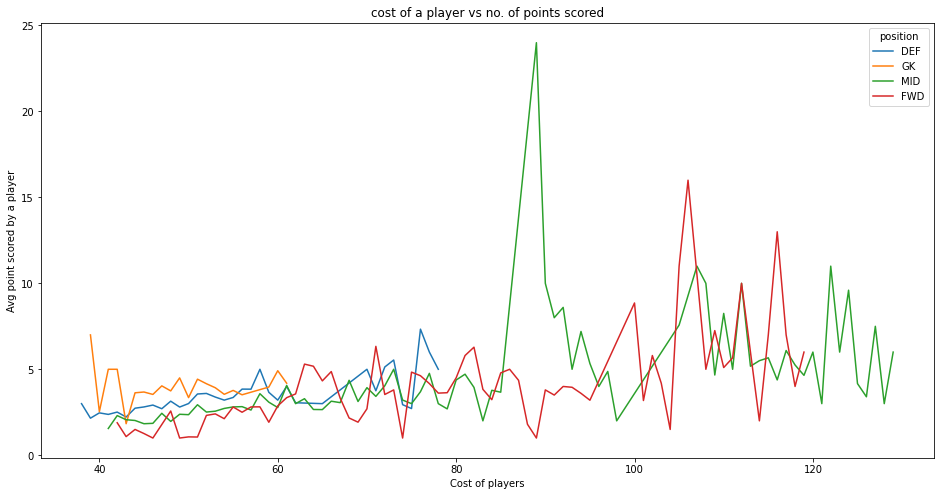

In [ ]:
plt.subplots(figsize=(16,8))

plt.title('cost of a player vs no. of points scored')
plt.xlabel('Cost of players')
plt.ylabel('Avg point scored by a player')
sns.lineplot(data = price_vs_perf, x= 'value', y='pts_mean', hue='position')
# sns.pointplot(data = price_vs_perf, x= 'value', y='pts_mean' , hue='position', palette= 'nipy_spectral')

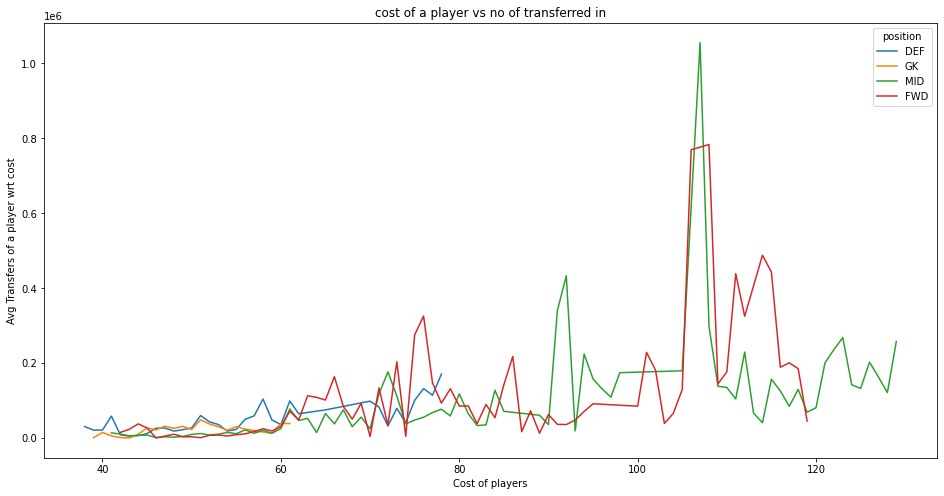

In [ ]:
plt.subplots(figsize=(16,8))

plt.title('cost of a player vs no of transferred in')
plt.xlabel('Cost of players')
plt.ylabel('Avg Transfers of a player wrt cost')
sns.lineplot(data = price_vs_perf, x= 'value', y='tr_in_mean', hue='position')


**We can say that the costly attackers are highly transferred by people. People generally dont' trade GKs and defenders. Only higher ranked GKS are transferred**

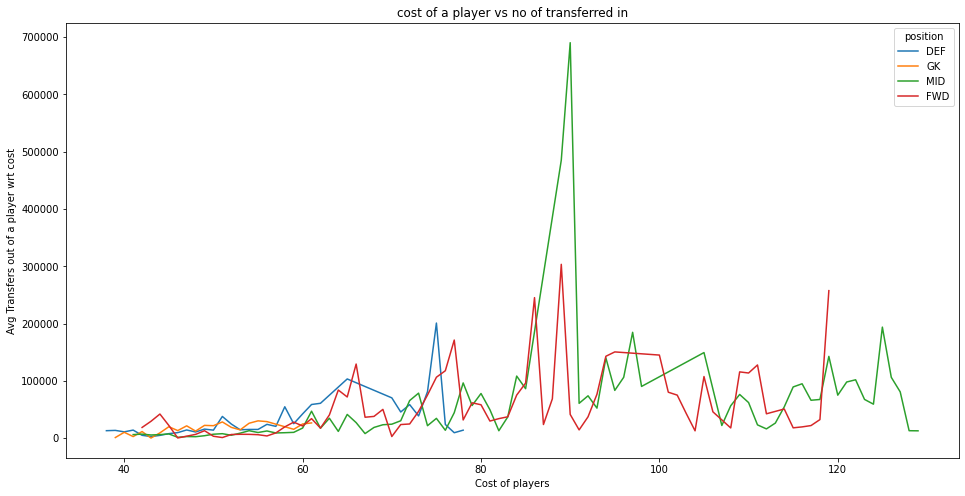

In [ ]:
plt.subplots(figsize=(16,8))

plt.title('cost of a player vs no of transferred in')
plt.xlabel('Cost of players')
plt.ylabel('Avg Transfers out of a player wrt cost')
sns.lineplot(data = price_vs_perf, x= 'value', y='tr_out_mean', hue='position')


**Firstly, we see that our midfielders are more costly than Forwards than Defenders and then GKs. Our We should divide our budget wrt to this distribution only.**

**As the cost increases, Some cheap GKs perform better as well but only a few GKS perform better.**

**Higher cost Defenders definitely give us better returns**

**It's effective to take midfielders who cost over 85, as probability of getting better points from them are more.**

**Some of the best attackers are ranged in 95-110 points. Better to invest on them**

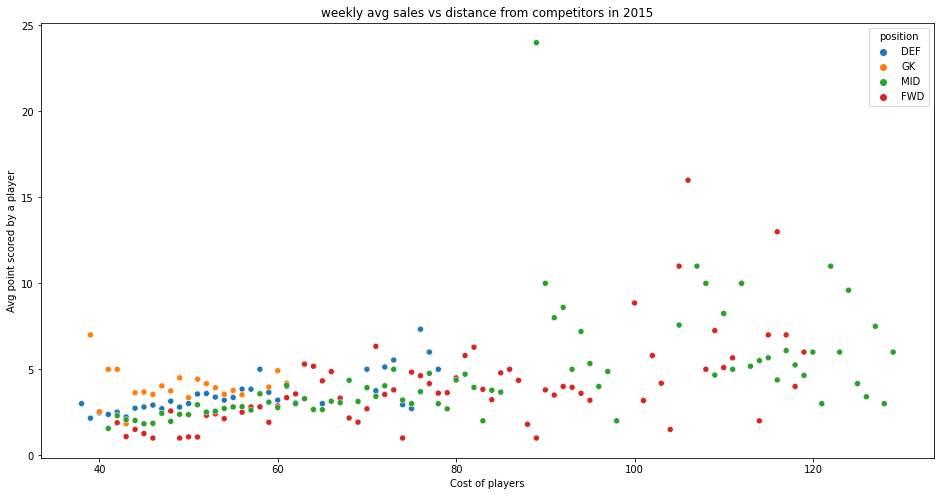

In [ ]:
plt.subplots(figsize=(16,8))

plt.title('weekly avg sales vs distance from competitors in 2015')
plt.xlabel('Cost of players')
plt.ylabel('Avg point scored by a player')
sns.scatterplot(data = price_vs_perf, x= 'value', y='pts_mean' , hue='position')

**we see that some of the good midfielders lie in the range 85-95**

**Majorly all high ranked defenders perform better in general.**

#Home and away fixture for best player outside or worst player in your team (Later as it's a historical data, not GW)

#Players from top teams had more FPL points than from players belonging to bottom half teams

In [ ]:
team_perf = df_gw_21_f.groupby(['team'], as_index=True).agg(
     pts_sum=('total_points', 'sum'),
     pts_count=('total_points', 'count'),
     pts_mean=('total_points', 'mean'),
     cost_sum=('value', 'sum'),
     cost_count=('value', 'count'),
     cost_mean=('value', 'mean')).reset_index()

NameError: ignored

In [ ]:
team_perf.sort_values(ascending=False, by='pts_sum')

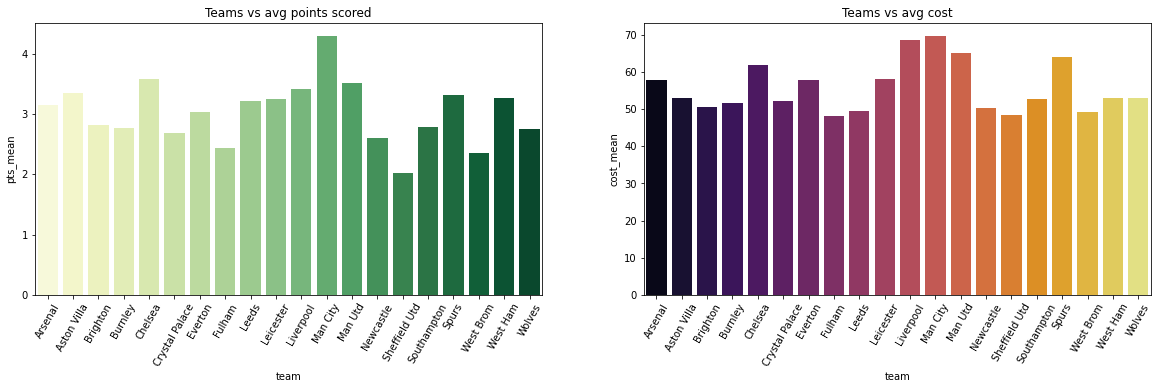

In [ ]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Teams vs avg points scored')
plt.xlabel('Teams')
plt.xticks(rotation = 60)
plt.ylabel('Avg pts scored')
sns.barplot(data = team_perf, x= 'team', y='pts_mean', palette= 'YlGn')


plt.subplot(1,2,2)
plt.title('Teams vs avg cost')
plt.xlabel('Teams)')
plt.xticks(rotation = 60)
plt.ylabel(' avg cost')
sns.barplot(data = team_perf, x= 'team', y='cost_mean', palette= 'inferno')


We can see that liverpool players were costliest but didn't give max returns. Man City players on an avg are worth considering. Arsenal players are costly ut don't give good returns, but manchester united players being cheap gave good returns. 

In [ ]:
team_perf_position = df_gw_21_f.groupby(['team','position'], as_index=True).agg(
     pts_sum=('total_points', 'sum'),
     pts_count=('total_points', 'count'),
     pts_mean=('total_points', 'mean'),
     cost_sum=('value', 'sum'),
     cost_count=('value', 'count'),
     cost_mean=('value', 'mean')).reset_index()

In [ ]:
np.unique(team_perf_position.team)

array(['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Sheffield Utd',
       'Southampton', 'Spurs', 'West Brom', 'West Ham', 'Wolves'],
      dtype=object)

In [ ]:
top8 = ['Arsenal', 'Chelsea', 'Leicester', 'Liverpool', 'Man City', 'Spurs', 'Man Utd', 'Aston Villa'] 

In [ ]:
team_perf_position = team_perf_position[team_perf_position.team.isin(top8)]

In [ ]:
team_perf_position

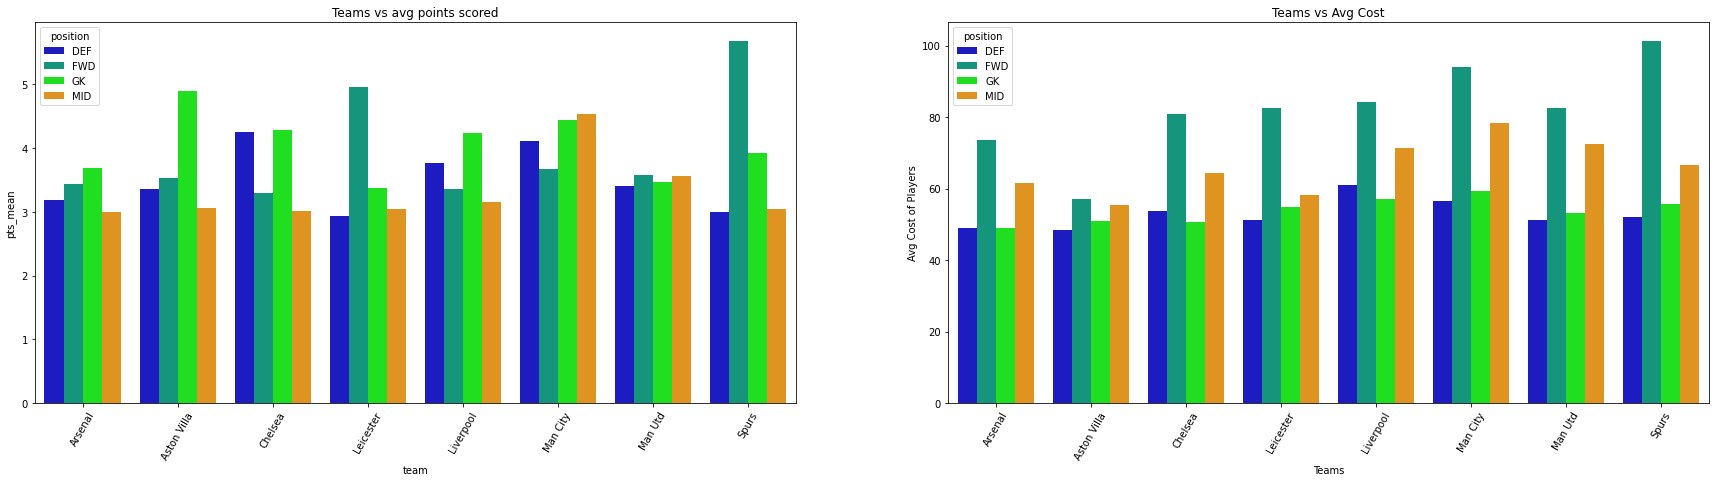

In [ ]:
plt.subplots(figsize=(30,7))
plt.subplot(1,2,1)
plt.title('Teams vs avg points scored')
plt.xlabel('Teams')
plt.xticks(rotation = 60)
plt.ylabel('Avg pts scored')
sns.barplot(data = team_perf_position, x= 'team', y='pts_mean',hue='position', palette= 'nipy_spectral')
plt.savefig('Results/teamPts.png')


plt.subplot(1,2,2)
plt.title('Teams vs Avg Cost')
plt.xticks(rotation = 60)
sns.barplot(data = team_perf_position, x= 'team', y='cost_mean',hue='position', palette= 'nipy_spectral')
plt.xlabel('Teams')
plt.ylabel('Avg Cost of Players')
plt.savefig('Results/teamCost.png')


**We now can verify that spurs forwards are amazing and give best returns among allnut costs a fortune as well.**

**Spurs Goalkeeper is Cheap but is worth taking.**

**Leicester attacks being cheap give good returns**

**Go for man city midfielders. They are way above the others but cost much as well. Aston villa's midfielders are way cheaper and provide good points**

**Chelsea Defenders all the way. So Chelsea's GK would be cosidered for more points. Aston Villa's GK is  the best. Don't go for arsenal and Spurs defenders.**

#Transfer in transfer out

#It's best to have (normally expensive) players who are top in the scoring charts but it is also good to have value players in best form at a given time to offset some bad performances by the top-scoring players. Thus find value players

#Next, based on the intuition to have the top scoring players, we compulsorily try to put in the top scorer for each position first. Then we go onto fill the rest of the 11 players.

#Top 10 selected players highest scoring and their selection top 10 selected players in each category and their scoring (agg), 4 lines


#Pick 15 best players acc to rules in 1st week and see how they fare rest of the season. To check if we do no transfers

In [ ]:
best_gk = df_gw_21_f[(df_gw_21_f.position == 'GK')  & ( df_gw_21_f.GW==1)].sort_values(by='total_points', ascending=False).head(5)

In [ ]:
best_mid = df_gw_21_f[(df_gw_21_f.position == 'MID')  & ( df_gw_21_f.GW==1)].sort_values(by='total_points', ascending=False).head(10)

In [ ]:
best_fwd = df_gw_21_f[(df_gw_21_f.position == 'FWD')  & ( df_gw_21_f.GW==1)].sort_values(by='total_points', ascending=False).head(10)

In [ ]:
best_def = df_gw_21_f[(df_gw_21_f.position == 'DEF')  & ( df_gw_21_f.GW==1)].sort_values(by='total_points', ascending=False).head(10)

In [ ]:
best_def

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
135,Gabriel Magalhães,DEF,Arsenal,3.1,0,3,37,1,0.3,494,2,0,1,8.5,51.8,2020-09-12T11:30:00Z,90,8,0,0,0,0,1,0,85593,3,0,33.0,15,0,0,0,50,False,0,1
354,Romain Saïss,DEF,Wolves,2.1,0,3,34,1,0.2,461,8,0,1,10.2,63.4,2020-09-14T17:00:00Z,90,15,0,0,0,0,1,0,177607,2,0,38.0,15,0,0,0,50,False,0,1
394,Timothy Castagne,DEF,Leicester,3.5,0,2,38,1,3.0,498,5,0,1,8.4,45.8,2020-09-13T13:00:00Z,90,18,0,0,0,0,1,0,67356,3,0,35.0,14,0,0,0,55,False,0,1
340,Reece James,DEF,Chelsea,3.1,1,3,44,0,30.3,123,7,1,1,11.8,76.8,2020-09-14T19:15:00Z,90,3,0,0,0,0,1,0,304155,3,1,11.0,14,0,0,0,50,False,0,1
252,Lucas Digne,DEF,Everton,2.4,1,3,38,1,19.9,155,4,0,0,6.1,40.8,2020-09-13T15:30:00Z,90,17,0,0,0,0,1,0,397204,1,0,0.0,12,0,0,0,60,False,0,1
174,James Justin,DEF,Leicester,2.6,1,1,32,1,13.0,239,5,0,0,3.5,20.0,2020-09-13T13:00:00Z,90,18,0,0,0,0,1,0,681843,3,0,2.0,9,0,0,0,45,False,1,1
242,Kurt Zouma,DEF,Chelsea,3.1,0,0,25,0,0.2,110,7,1,1,6.9,51.8,2020-09-14T19:15:00Z,90,3,0,0,0,0,1,0,53224,3,1,17.0,8,0,0,0,50,False,0,1
76,Conor Coady,DEF,Wolves,2.1,0,2,29,1,0.0,459,8,0,0,2.2,22.0,2020-09-14T17:00:00Z,90,15,0,0,0,0,1,0,556410,2,0,0.0,8,0,0,0,50,False,0,1
173,Jamal Lewis,DEF,Newcastle,1.6,0,1,31,1,39.8,513,6,0,0,5.9,19.4,2020-09-12T19:00:00Z,90,19,0,0,0,0,1,0,76806,2,0,0.0,7,0,0,0,45,False,0,1
405,Virgil van Dijk,DEF,Liverpool,4.8,0,0,19,0,0.8,250,3,3,1,7.5,37.6,2020-09-12T16:30:00Z,90,10,0,0,0,0,1,0,1528505,3,4,37.0,7,0,0,0,65,True,0,1


In [ ]:
best_players_GW1 = ['Vicente Guaita', 'Jordan Pickford','Gabriel Magalhães', 'Romain Saïss', 'Timothy Castagne', 'Reece James','Lucas Digne', 'Mohamed Salah', 'Willian Borges Da Silva', 'Jeff Hendrick','Jorge Luiz Frello Filho','Mateusz Klich','Jamie Vardy','Callum Wilson','Raúl Jiménez']

In [ ]:
df_best_players_GW1 = df_gw_21_f[df_gw_21_f.name.isin(best_players_GW1)]

In [ ]:
df_best_fwd_GW1 = df_best_players_GW1[df_best_players_GW1.position == 'FWD']

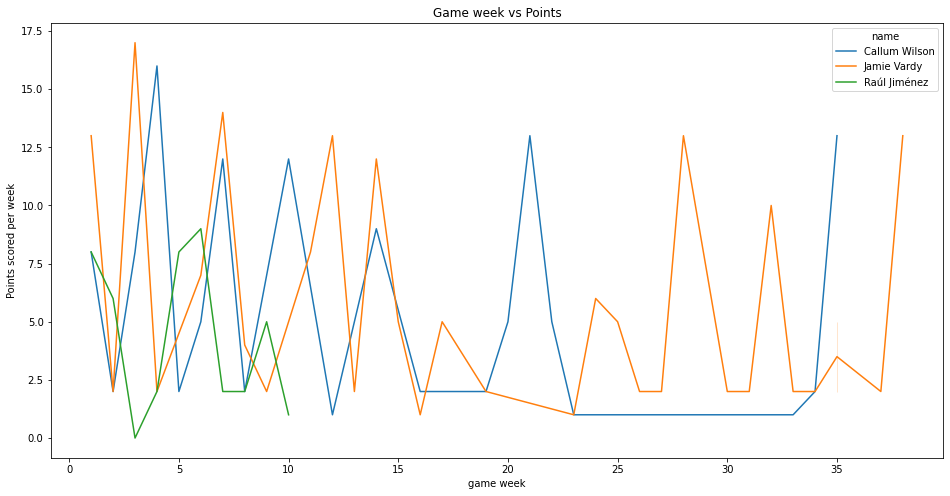

In [ ]:
plt.subplots(figsize=(16,8))

plt.title('Game week vs Points')
plt.xlabel('game week')
plt.ylabel('Points scored per week')
sns.lineplot(data = df_best_fwd_GW1, x= 'GW', y='total_points', hue='name')


In [ ]:
df_best_players_GW1_gb = df_best_players_GW1.groupby(['GW'], as_index=True).agg(
     pts_sum=('total_points', 'sum'),
     pts_count=('total_points', 'count'),
     tr_in_sum=('transfers_in', 'sum'),
     tr_in_mean=('transfers_in', 'mean'),
     tr_out_sum=('transfers_out', 'sum'),
     tr_out_mean=('transfers_out', 'mean'),
     ict_index_sum=('ict_index', 'sum')).reset_index()

In [ ]:
df_best_players_GW1_gb['tr_out_sum'] = df_best_players_GW1_gb['tr_out_sum']/100000
df_best_players_GW1_gb['tr_in_sum'] = df_best_players_GW1_gb['tr_in_sum']/100000

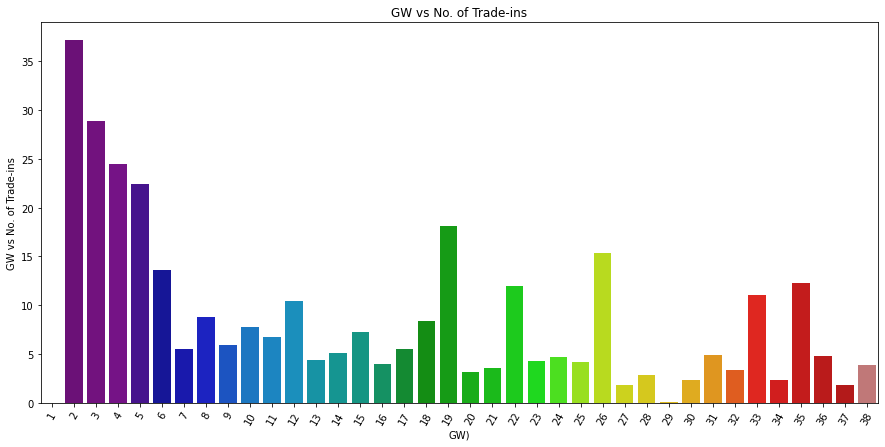

In [ ]:
plt.subplots(figsize=(30,12))

plt.subplot(2,2,1)
sns.barplot(data = df_best_players_GW1_gb, x= 'GW', y='pts_sum', palette= 'nipy_spectral')
plt.title('GW vs Total Points Scored')
plt.xlabel('GW')
plt.xticks(rotation = 60)
plt.ylabel('Total Pts Scored')

plt.subplot(2,2,2)
sns.barplot(data = df_best_players_GW1_gb, x= 'GW', y='ict_index_sum', palette= 'nipy_spectral')
plt.title('GW vs ICT index')
plt.xlabel('GW')
plt.xticks(rotation = 60)
plt.ylabel('ICT Index')

plt.subplot(2,2,3)
sns.barplot(data = df_best_players_GW1_gb, x= 'GW', y='tr_in_sum', palette= 'nipy_spectral')
plt.title('GW vs No. of Trade-ins')
plt.xlabel('GW)')
plt.xticks(rotation = 60)
plt.ylabel('GW vs No. of Trade-ins')

plt.subplot(2,2,4)
sns.barplot(data = df_best_players_GW1_gb, x= 'GW', y='tr_out_sum', palette= 'nipy_spectral')
plt.title('GW vs trade out')
plt.xlabel('GW')
plt.xticks(rotation = 60)
plt.ylabel(' trade out')

For defense, find the team which concedes more goal and find the value of player per game and minutes played. better to take your defenders and GK from that.

#one hot position

In [ ]:
one_hot = pd.get_dummies(df_gw_21_f['position'])
# Drop column B as it is now encoded
# df_test_csv = df_test_csv.drop('position',axis = 1)
# Join the encoded df
df_gw_21_f = df_gw_21_f.join(one_hot)

In [ ]:
df_gw_21_f

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,DEF,FWD,GK,MID
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14T19:15:00Z,45,5,0,0,0,0,1,0,32205,3,1,32.0,1,0,0,0,55,True,0,1,0,1,0,0
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,6,2,0,2.2,10.4,2020-09-12T19:00:00Z,90,14,0,0,0,0,1,0,70232,2,0,0.0,1,0,0,0,50,True,0,1,1,0,0,0
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,8,2,0,1.8,18.2,2020-09-14T17:00:00Z,90,20,0,0,0,0,1,2,462939,2,0,0.0,1,0,0,0,50,True,0,1,0,0,1,0
4,Abdoulaye Doucouré,MID,Everton,1.3,0,0,20,1,44.6,512,4,0,0,6.9,20.4,2020-09-13T15:30:00Z,90,17,0,0,0,0,1,0,143040,1,0,4.0,3,0,0,0,55,False,0,1,0,0,0,1
5,Aboubakar Kamara,MID,Fulham,0.4,0,0,-2,0,1.8,190,2,3,0,0.2,0.0,2020-09-12T11:30:00Z,62,1,0,0,0,0,1,0,6711,3,0,5.0,2,0,0,0,50,True,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24350,James McCarthy,MID,Crystal Palace,1.5,0,0,10,0,11.1,131,374,2,0,2.0,8.8,2021-05-23T15:00:00Z,87,11,0,0,0,0,38,0,59854,0,2,0.0,2,-123,366,489,43,False,0,38,0,0,0,1
24357,Nathan Tella,MID,Southampton,0.5,0,0,2,0,1.4,524,377,1,0,2.5,4.6,2021-05-23T15:00:00Z,28,19,0,0,0,0,38,0,29751,0,3,19.0,1,838,1899,1061,43,False,0,38,0,0,0,1
24360,Aaron Ramsdale,GK,Sheffield Utd,9.0,0,2,30,1,10.0,483,376,0,0,3.2,22.0,2021-05-23T15:00:00Z,90,4,0,0,0,0,38,3,162985,0,1,0.0,9,13618,17381,3763,46,True,0,38,0,0,1,0
24363,Kalvin Phillips,MID,Leeds,6.5,0,0,17,0,12.8,204,372,1,1,6.1,40.6,2021-05-23T15:00:00Z,90,18,0,0,0,0,38,0,74008,1,3,8.0,6,210,789,579,49,True,1,38,0,0,0,1


In [ ]:
# one_hot = pd.get_dummies(df_gw_21_f['team'])
# # Drop column B as it is now encoded
# # df_test_csv = df_test_csv.drop('position',axis = 1)
# # Join the encoded df
# df_gw_21_f = df_gw_21_f.join(one_hot)

Text(0.5, 1.0, 'Pearson correlation matrix')

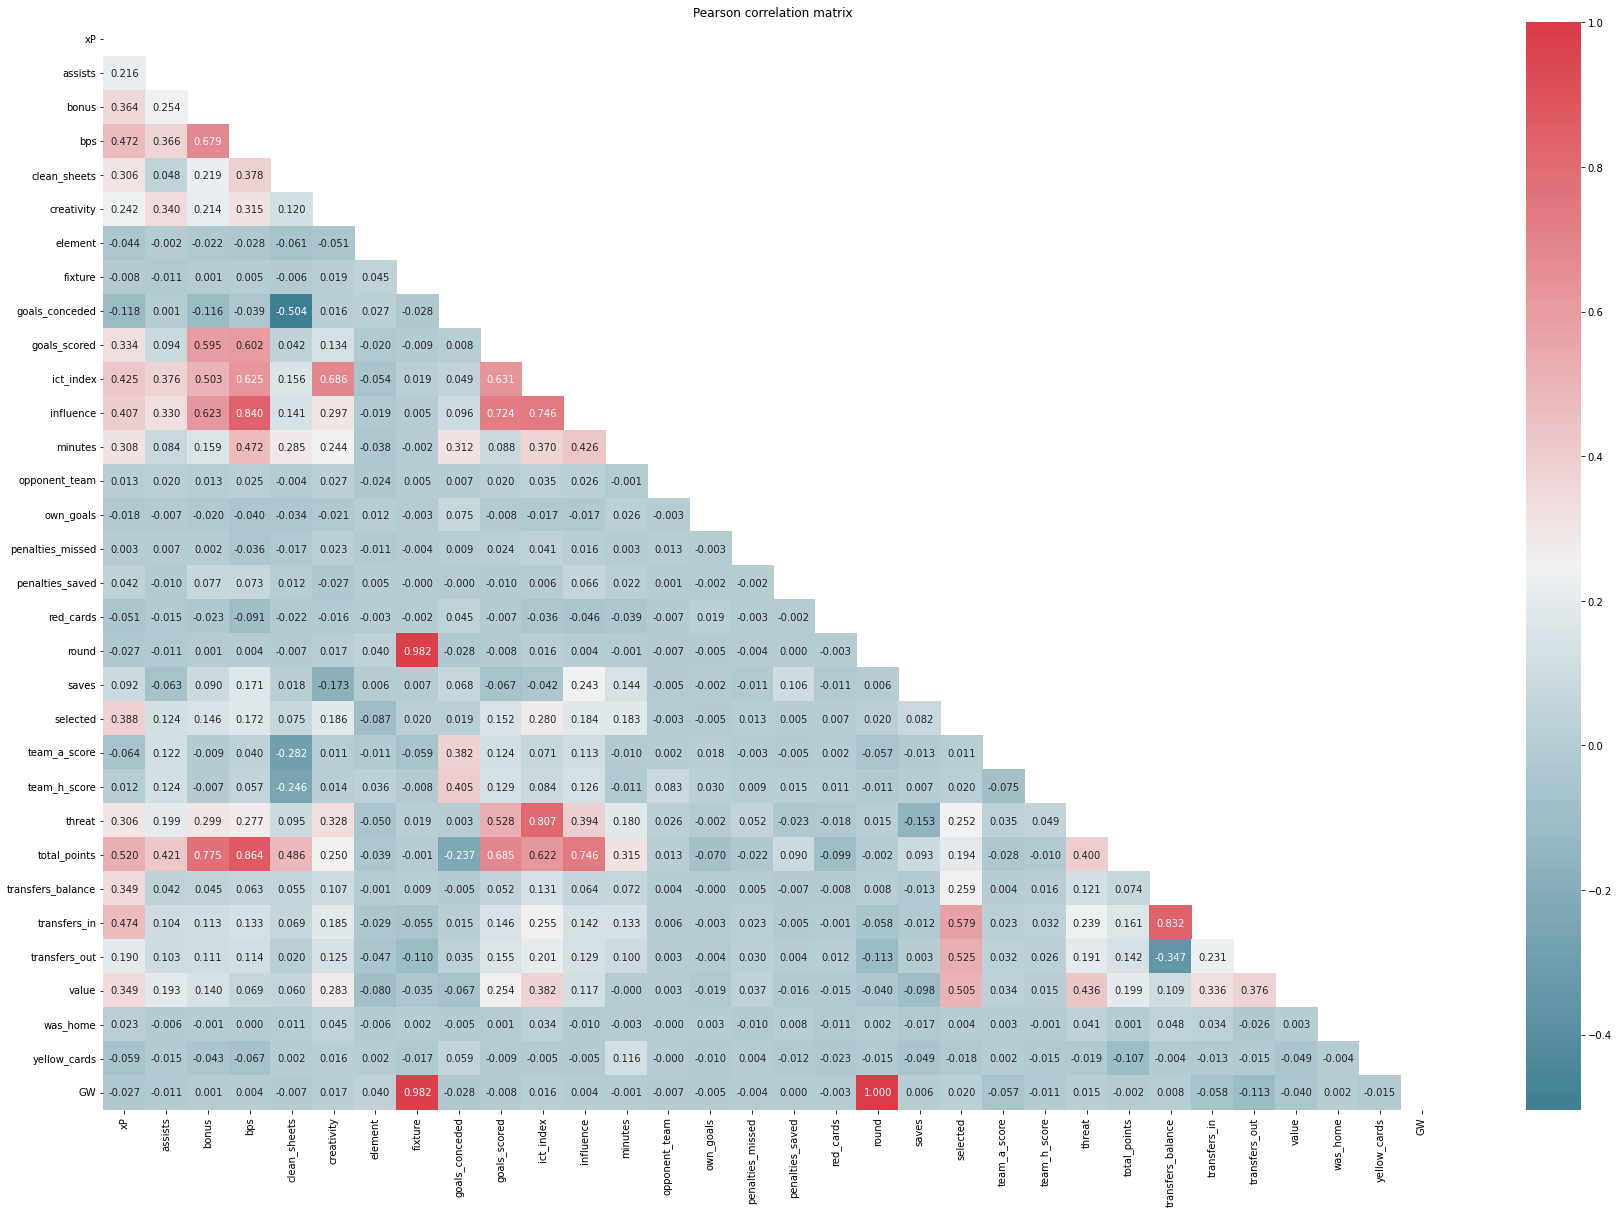

In [ ]:
plt.figure(figsize=(30,20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlation_mat = df_gw_21_f.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_mat, dtype='bool')
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=correlation_mat, mask=mask, annot=True, cmap=cmap, fmt='.3f')
plt.title("Pearson correlation matrix")

bins of no. of selections vs their performance agg

In [ ]:
df_corr_features = df_gw_21_f[['total_points','selected','transfers_in','minutes','value','ict_index','DEF','GK','FWD','MID']]

3

[link text](https://)

In [ ]:
df_fwds = df_gw_21_f[df_gw_21_f['position'] =='FWD']
df_fwds


In [ ]:
df_fwds[df_fwds['team'] == 'Liverpool'].head(20)

In [ ]:
df_fwds.corr()

,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
xP,1.000000,0.337171,0.454541,0.616900,0.368247,0.502073,-0.121419,-0.107930,0.363209,0.511559,0.665051,0.614355,0.682189,0.042521,0.026629,0.012781,NaN,0.003506,-0.110077,NaN,0.508689,0.050572,0.053419,0.604468,0.674688,0.312989,0.554279,0.230108,0.517688,0.003969,0.074542,-0.110077
assists,0.337171,1.000000,0.213597,0.431489,0.155965,0.418415,-0.034830,-0.043934,0.160748,0.139178,0.400766,0.393114,0.301747,0.010915,-0.003831,0.014780,NaN,0.020911,-0.044804,NaN,0.227090,0.107704,0.092324,0.300629,0.505223,0.035154,0.151621,0.132114,0.219654,-0.013330,0.049031,-0.044804
bonus,0.454541,0.213597,1.000000,0.829680,0.240902,0.368463,-0.033607,-0.034605,0.140688,0.833140,0.663397,0.813311,0.380482,0.035261,-0.004781,-0.012661,NaN,-0.010697,-0.033485,NaN,0.214593,0.103541,0.049707,0.513312,0.834167,0.012131,0.137065,0.146364,0.219525,-0.009696,0.088090,-0.033485
bps,0.616900,0.431489,0.829680,1.000000,0.334798,0.554009,-0.073658,-0.054775,0.288648,0.908932,0.837682,0.963053,0.562219,0.028486,-0.009329,-0.029641,NaN,-0.020874,-0.051869,NaN,0.297944,0.145442,0.120129,0.656780,0.961979,0.078984,0.240575,0.177818,0.328926,-0.011062,0.088581,-0.051869
clean_sheets,0.368247,0.155965,0.240902,0.334798,1.000000,0.376996,-0.069302,-0.053906,-0.143488,0.247926,0.408479,0.325856,0.474026,0.009921,-0.005535,0.009397,NaN,-0.012386,-0.051577,NaN,0.210362,-0.133743,-0.140800,0.379600,0.369714,0.103439,0.193938,0.088837,0.235846,0.012038,0.064208,-0.051577
creativity,0.502073,0.418415,0.368463,0.554009,0.376996,1.000000,-0.092284,-0.029274,0.373668,0.340891,0.748103,0.555166,0.680777,0.039114,0.006341,0.022257,NaN,0.010673,-0.032677,NaN,0.302203,0.046657,0.035512,0.598436,0.581001,0.113512,0.249196,0.140741,0.341398,0.013148,0.157886,-0.032677
element,-0.121419,-0.034830,-0.033607,-0.073658,-0.069302,-0.092284,1.000000,0.149087,-0.077232,-0.049505,-0.111282,-0.076093,-0.133041,-0.032814,0.012135,-0.007639,NaN,-0.018907,0.142888,NaN,-0.118411,-0.019984,0.037830,-0.116781,-0.087652,0.003508,-0.056841,-0.072400,-0.188900,0.002349,-0.031611,0.142888
fixture,-0.107930,-0.043934,-0.034605,-0.054775,-0.053906,-0.029274,0.149087,1.000000,-0.061298,-0.046861,-0.057437,-0.054624,-0.083502,0.020361,-0.028664,-0.021560,NaN,-0.008597,0.979112,NaN,-0.018252,-0.039554,0.001891,-0.056992,-0.072220,0.015574,-0.062968,-0.096226,-0.073829,0.001446,-0.026462,0.979112
goals_conceded,0.363209,0.160748,0.140688,0.288648,-0.143488,0.373668,-0.077232,-0.061298,1.000000,0.204219,0.403093,0.296698,0.606278,0.011341,0.070246,0.015100,NaN,0.104432,-0.060760,NaN,0.249460,0.205412,0.237875,0.392954,0.357047,0.098226,0.232741,0.142126,0.214374,-0.014123,0.162876,-0.060760
goals_scored,0.511559,0.139178,0.833140,0.908932,0.247926,0.340891,-0.049505,-0.046861,0.204219,1.000000,0.748062,0.923828,0.410543,0.034058,-0.005240,0.005112,NaN,0.010736,-0.042929,NaN,0.236991,0.143311,0.116083,0.604177,0.868076,0.065454,0.199010,0.146934,0.241195,-0.004967,0.096668,-0.042929


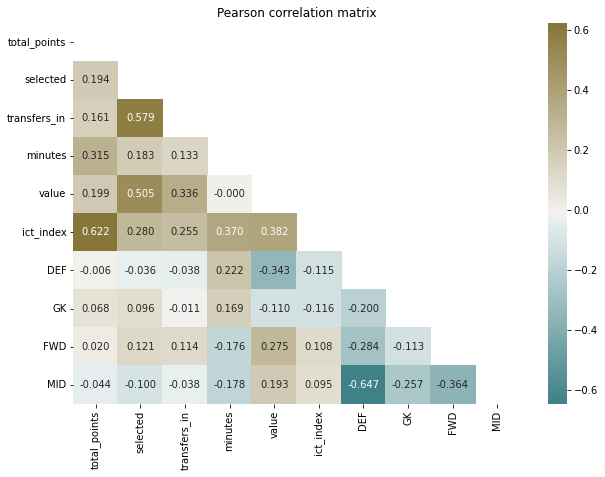

In [ ]:
plt.figure(figsize=(10,7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 70, as_cmap=True)

correlation_mat = df_corr_features.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_mat, dtype='bool')
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=correlation_mat, mask=mask, annot=True, cmap=cmap, fmt='.3f')
plt.title("Pearson correlation matrix")
plt.savefig('Results/correlation.png')

In [ ]:
df_fwds_gb = df_fwds.groupby(['team'], as_index=True).agg(
     min_sum=('minutes', 'sum'),
     min_count=('minutes', 'count'),
     min_mean=('minutes', 'mean'),
     pts_sum=('total_points', 'sum'),
     pts_count=('total_points', 'count'),
     pts_mean=('total_points', 'mean')).reset_index()

In [ ]:
df_fwds_gb['noOfFrwds'] = df_fwds_gb['pts_count']/38

Finding no. of forwards and avg points scored by a forward per team in a season 

We have found out: that spurs playing least number of forwards per game but their forwards still scoring way better than any other team on an avg

In [ ]:
df_fwds_gb.sort_values(by='pts_mean', ascending=False)

,team,min_sum,min_count,min_mean,pts_sum,pts_count,pts_mean,noOfFrwds
16,Spurs,3389,89,38.078652,256,89,2.876404,2.342105
9,Leicester,4309,110,39.172727,298,110,2.709091,2.894737
8,Leeds,4368,121,36.099174,284,121,2.347107,3.184211
0,Arsenal,2327,76,30.618421,165,76,2.171053,2.000000
4,Chelsea,4369,114,38.324561,244,114,2.140351,3.000000
7,Fulham,4560,93,49.032258,191,93,2.053763,2.447368
10,Liverpool,3017,79,38.189873,151,79,1.911392,2.078947
15,Southampton,5194,185,28.075676,297,185,1.605405,4.868421
12,Man Utd,2850,111,25.675676,175,111,1.576577,2.921053
6,Everton,5928,203,29.201970,305,203,1.502463,5.342105


#Arrange if player is getting substitution

Baseline model

In [ ]:
 test_year= ['2016-17','2017-18','2018-19','2019-20']
 validate_year = [ '2020-21']

In [ ]:
#https://medium.com/@joseph.m.oconnor.88/linearly-optimising-fantasy-premier-league-teams-part-2-2bd9c3b3d34e
def select_team(predicted_Scores, player_price, player_positions, clubs, total_budget=100, sub_factor=0.6):
    num_players = len(predicted_Scores)
    model = pulp.LpProblem("Constrained value maximisation", pulp.LpMaximize)
    lp_decisions = [
        pulp.LpVariable("x{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    lp_sub_decisions = [
        pulp.LpVariable("z{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    lp_captain_decisions = [
        pulp.LpVariable("y{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]


    model += sum((lp_captain_decisions[i] + lp_decisions[i] + lp_sub_decisions[i]*sub_factor) * predicted_Scores[i]
                 for i in range(num_players)), "Objective"

    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 2) >= 3
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 2) <= 5
    model += sum(lp_decisions[i] + lp_sub_decisions[i] for i in range(num_players) if player_positions[i] == 2) == 5

    model += sum((lp_decisions[i] + lp_sub_decisions[i]) * player_price[i] for i in range(num_players)) <= total_budget 

    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 1) == 1
    model += sum(lp_decisions[i] + lp_sub_decisions[i] for i in range(num_players) if player_positions[i] == 1) == 2

    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 2) >= 3
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 2) <= 5
    model += sum(lp_decisions[i] + lp_sub_decisions[i] for i in range(num_players) if player_positions[i] == 2) == 5

    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 4) >= 1
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 4) <= 3

    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 3) >= 3
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 3) <= 5
    model += sum(lp_decisions[i] + lp_sub_decisions[i] for i in range(num_players) if player_positions[i] == 3) == 5




    model += sum(lp_decisions[i] + lp_sub_decisions[i] for i in range(num_players) if player_positions[i] == 4) == 3

    for club_id in np.unique(clubs):
        model += sum(lp_decisions[i] + lp_sub_decisions[i] for i in range(num_players) if clubs[i] == club_id) <= 3 

    model += sum(lp_decisions) == 11  
    model += sum(lp_captain_decisions) == 1  
    
    for i in range(num_players):  
        model += (lp_decisions[i] - lp_captain_decisions[i]) >= 0  
        model += (lp_decisions[i] + lp_sub_decisions[i]) <= 1  

    model.solve()
    print("Total expected score = {}".format(model.objective.value()))

    return lp_decisions, lp_captain_decisions, lp_sub_decisions

In [ ]:
print( test_year[0]+"/gws/merged_gw.csv")

2016-17/gws/merged_gw.csv


In [ ]:
def convertPosToNum(pos):
  #print(type(pos))
  # print(pos)
  if pos == 'GK':
    return 1
  elif pos == 'MID':
    return 3
  elif pos == 'DEF':
    return 2
  else:
    return 4

In [ ]:
#we can constraints on category not considered here
df= pd.read_csv("cleaned_merged_seasons.csv",encoding='latin1')
df_target= pd.read_csv("2020-21/gws/merged_gw.csv",encoding='latin1')
#df_target= pd.read_csv("2020-21/gws/gw1.csv",encoding='latin1') #if u want to run for 1st gw
# df_target=df[(df['season_x'] == '2020-21')]
df = df[~(df['season_x'] == '2020-21')]
df['team'] =  np.nan
df['position'] = df['position'].apply(convertPosToNum)

df_mean = df.groupby("name").mean().reset_index()
df_target_mean = df_target.groupby("name").mean().reset_index()
df


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,team
0,0,2016-17,Aaron Cresswell,2,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1,NaN
1,1,2016-17,Abdoulaye DoucourÃ©,3,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1,NaN
2,2,2016-17,Adam Forshaw,3,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1,NaN
3,3,2016-17,Adam Lallana,3,NaN,1,2,33,0,33.7,205,8,3,1,14.2,51.2,2016-08-14T15:00:00Z,75,1,Arsenal,0,0,0,0,1,0,155525,4.0,3.0,57.0,11,0,0,0,70,False,1,1,NaN
4,4,2016-17,AdriÃ¡n San Miguel del Castillo,1,NaN,0,0,16,0,0.0,450,10,2,0,3.0,29.8,2016-08-15T19:00:00Z,90,4,Chelsea,0,0,0,0,1,4,94480,1.0,2.0,0.0,2,0,0,0,50,False,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44654,44654,2019-20,Yoshinori Muto,4,NaN,0,0,0,0,0.0,260,378,0,0,0.0,0.0,2020-07-26T15:00:00Z,0,10,Liverpool,0,0,0,0,47,0,6081,3.0,1.0,0.0,0,-16,46,62,51,True,0,47,NaN
44655,44655,2019-20,Youri Tielemans,3,NaN,0,0,11,0,37.4,448,376,1,0,6.9,12.6,2020-07-26T15:00:00Z,72,12,Man Utd,0,0,0,0,47,0,283764,2.0,0.0,19.0,2,-3103,1905,5008,61,True,0,47,NaN
44656,44656,2019-20,Yves Bissouma,3,NaN,0,0,22,0,1.3,53,372,1,1,4.8,39.2,2020-07-26T15:00:00Z,72,5,Burnley,0,0,0,0,47,0,2136,2.0,1.0,7.0,7,77,147,70,50,False,0,47,NaN
44657,44657,2019-20,Ãaglar SÃ¶yÃ¼ncÃ¼,2,NaN,0,0,0,0,0.0,164,376,0,0,0.0,0.0,2020-07-26T15:00:00Z,0,12,Man Utd,0,0,0,0,47,0,688011,2.0,0.0,0.0,0,-95515,165,95680,49,True,0,47,NaN


In [ ]:
df_target

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Aaron Connolly,FWD,Brighton,0.5,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14T19:15:00Z,45,5,0,0,0,0,1,0,32205,3,1,32.0,1,0,0,0,55,True,0,1
1,Aaron Cresswell,DEF,West Ham,2.1,0,0,11,0,11.2,435,6,2,0,2.2,10.4,2020-09-12T19:00:00Z,90,14,0,0,0,0,1,0,70232,2,0,0.0,1,0,0,0,50,True,0,1
2,Aaron Mooy,MID,Brighton,0.0,0,0,0,0,0.0,60,7,0,0,0.0,0.0,2020-09-14T19:15:00Z,0,5,0,0,0,0,1,0,2010,3,1,0.0,0,0,0,0,50,True,0,1
3,Aaron Ramsdale,GK,Sheffield Utd,2.5,0,0,12,0,0.0,483,8,2,0,1.8,18.2,2020-09-14T17:00:00Z,90,20,0,0,0,0,1,2,462939,2,0,0.0,1,0,0,0,50,True,0,1
4,Abdoulaye DoucourÃ©,MID,Everton,1.3,0,0,20,1,44.6,512,4,0,0,6.9,20.4,2020-09-13T15:30:00Z,90,17,0,0,0,0,1,0,143040,1,0,4.0,3,0,0,0,55,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,Aaron Ramsdale,GK,Sheffield Utd,9.0,0,2,30,1,10.0,483,376,0,0,3.2,22.0,2021-05-23T15:00:00Z,90,4,0,0,0,0,38,3,162985,0,1,0.0,9,13618,17381,3763,46,True,0,38
24361,Adrien Silva,MID,Leicester,0.0,0,0,0,0,0.0,220,373,0,0,0.0,0.0,2021-05-23T15:00:00Z,0,17,0,0,0,0,38,0,16396,4,2,0.0,0,-16,0,16,44,True,0,38
24362,Sidnei Tavares,MID,Leicester,0.0,0,0,0,0,0.0,676,373,0,0,0.0,0.0,2021-05-23T15:00:00Z,0,17,0,0,0,0,38,0,337,4,2,0.0,0,32,60,28,44,True,0,38
24363,Kalvin Phillips,MID,Leeds,6.5,0,0,17,0,12.8,204,372,1,1,6.1,40.6,2021-05-23T15:00:00Z,90,18,0,0,0,0,38,0,74008,1,3,8.0,6,210,789,579,49,True,1,38


In [ ]:
df_mean

,name,Unnamed: 0,position,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,team
0,Aaron Connolly,36987.514286,4.0,0.085714,0.142857,4.171429,0.142857,2.611429,534.000000,204.228571,0.628571,0.085714,2.171429,4.302857,35.714286,10.257143,0.0,0.0,0.000000,0.000000,23.314286,0.000000,133304.828571,1.142857,1.314286,15.142857,1.742857,5049.200000,19026.057143,13976.857143,44.285714,0.485714,0.000000,23.314286,NaN
1,Aaron Cresswell,18619.592105,2.0,0.065789,0.105263,10.842105,0.138158,10.390132,418.750000,192.375000,1.131579,0.026316,2.660526,12.180263,62.493421,10.026316,0.0,0.0,0.000000,0.006579,20.118421,0.000000,66077.835526,1.368421,1.559211,3.993421,1.914474,2009.388158,6843.842105,4834.453947,50.276316,0.500000,0.111842,20.118421,NaN
2,Aaron Mooy,23628.368421,3.0,0.052632,0.192982,11.614035,0.166667,19.200877,295.666667,189.815789,1.166667,0.078947,4.289474,14.928070,65.535088,10.666667,0.0,0.0,0.000000,0.008772,20.228070,0.000000,160977.105263,1.105263,1.324561,8.771930,2.359649,-550.394737,10762.017544,11312.412281,51.228070,0.500000,0.078947,20.228070,NaN
3,Aaron Ramsdale,24706.902778,1.0,0.013889,0.180556,9.444444,0.069444,0.333333,521.750000,202.861111,0.861111,0.000000,1.384722,13.522222,46.250000,10.916667,0.0,0.0,0.013889,0.000000,22.013889,1.777778,125823.083333,1.291667,1.500000,0.000000,1.750000,2773.236111,10747.930556,7974.694444,42.986111,0.486111,0.000000,22.013889,NaN
4,Aaron Wan-Bissaka,21543.916667,2.0,0.058333,0.283333,12.058333,0.216667,6.417500,303.175000,219.091667,0.750000,0.000000,2.389167,15.165000,56.925000,10.458333,0.0,0.0,0.000000,0.008333,23.158333,0.000000,942436.908333,1.258333,1.433333,2.283333,2.183333,-1940.100000,33894.775000,35834.875000,47.425000,0.500000,0.108333,23.158333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Youri Tielemans,34004.250000,3.0,0.211538,0.211538,15.346154,0.288462,20.751923,486.500000,222.730769,0.942308,0.115385,5.190385,16.703846,75.192308,10.384615,0.0,0.0,0.000000,0.000000,24.288462,0.000000,308517.480769,1.288462,1.538462,14.423077,3.461538,-507.173077,22850.615385,23357.788462,62.634615,0.519231,0.076923,24.288462,NaN
497,Yves Bissouma,29821.907895,3.0,0.000000,0.000000,4.960526,0.092105,4.257895,259.500000,188.815789,0.657895,0.013158,1.472368,6.476316,39.697368,10.868421,0.0,0.0,0.000000,0.000000,20.697368,0.000000,1388.052632,1.184211,1.289474,3.973684,1.078947,-9.236842,72.105263,81.342105,48.565789,0.500000,0.118421,20.697368,NaN
498,Zeze Steven Sessegnon,24005.161290,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,541.000000,225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.709677,0.0,0.0,0.000000,0.000000,22.967742,0.000000,4389.548387,1.290323,1.645161,0.000000,0.000000,122.903226,360.032258,237.129032,40.000000,0.516129,0.000000,22.967742,NaN
499,Ãaglar SÃ¶yÃ¼ncÃ¼,34380.780000,2.0,0.020000,0.240000,13.840000,0.240000,1.672000,248.240000,221.540000,0.720000,0.020000,2.198000,15.488000,62.520000,10.180000,0.0,0.0,0.000000,0.020000,24.240000,0.000000,724343.060000,1.300000,1.540000,4.760000,2.440000,10633.020000,50304.300000,39671.280000,48.700000,0.520000,0.080000,24.240000,NaN


In [ ]:
pip install pulp

     |████████████████████████████████| 41.2 MB 1.2 MB/s 


In [ ]:
pip install colorama

In [ ]:

import pulp
from IPython.display import display, Markdown, Latex

In [ ]:
num_players = len(df_mean)
print(num_players)

501


In [ ]:
def getTeam(predicted_scores, player_prices, player_positions, player_clubs):
    num_players = len(predicted_scores)
    model = pulp.LpProblem("Constrained value maximisation", pulp.LpMaximize)
    lp_decisions = [
        pulp.LpVariable("x{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    lp_captain_decisions = [
        pulp.LpVariable("y{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]

    # objective function:
    model += sum((lp_captain_decisions[i] + lp_decisions[i]) * predicted_scores[i]
                 for i in range(num_players)), "Objective"

    # cost constraint
    model += sum(lp_decisions[i] * player_prices[i] for i in range(num_players)) <= 100  # total cost
    model += sum(lp_decisions) == 11  # total team size

    # position constraints
    # 1 goalkeeper
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 1) == 1
    # 3-5 defenders
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 2) >= 3
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 2) <= 5
    # 3-5 midfielders
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 3) >= 3
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 3) <= 5
    # 1-3 attackers
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 4) >= 1
    model += sum(lp_decisions[i] for i in range(num_players) if player_positions[i] == 4) <= 3

    # club constraint
    for club_id in np.unique(player_clubs):
        model += sum(lp_decisions[i] for i in range(num_players) if player_clubs[i] == club_id) <= 3  # max 3 players

    model += sum(lp_captain_decisions) == 1  # 1 captain
    
    for i in range(num_players):  # captain must also be on team
        model += (lp_decisions[i] - lp_captain_decisions[i]) >= 0

    model.solve()
    return lp_decisions, lp_captain_decisions

In [ ]:
#add team name

#find team value 
for index, row in df_target.iterrows():
  df_mean.loc[df_mean.name == row['name'], ['team']] = row['team']
  # df_target_mean.loc[df_target_mean.name == row['name'], ['team']] = row['team']

# df_target_mean['team'] = df_target_mean['team'].astype(dtype="category")
# df_target_mean= df_target_mean.dropna(subset=['team']).reset_index()
# df_target_mean['team'] =  df_target_mean.team.cat.codes

df_mean['team'] = df_mean['team'].astype(dtype="category")
df_mean= df_mean.dropna(subset=['team']).reset_index()
df_mean['team'] =  df_mean.team.cat.codes

df_mean["position"] = df_mean["position"].astype(int)
df_mean['total_points'] = df_mean['total_points'] * 1000
df_mean['value'] = df_mean['value'] * 1000
df_mean['value'] = df_mean['value'].astype(int)
df_mean['total_points'] = df_mean['total_points'].astype(int)
df_mean['value'] = df_mean['value'] / 10000
df_mean = df_mean[['value','total_points','position','name','team']]



In [ ]:
df_mean.sort_values(by="total_points",ascending=False)
df_mean

,value,total_points,position,name,team
0,4.4285,1742,4,Aaron Connolly,2
1,5.0276,1914,2,Aaron Cresswell,18
2,5.1228,2359,3,Aaron Mooy,2
3,4.2986,1750,1,Aaron Ramsdale,14
4,4.7425,2183,2,Aaron Wan-Bissaka,12
...,...,...,...,...,...
496,6.2634,3461,3,Youri Tielemans,9
497,4.8565,1078,3,Yves Bissouma,2
498,4.0000,0,2,Zeze Steven Sessegnon,7
499,4.8700,2440,2,Ãaglar SÃ¶yÃ¼ncÃ¼,9


In [ ]:

expected_scores = df_mean["total_points"]  # total points from last season
prices = df_mean["value"]
positions = df_mean["position"]
clubs = df_mean["team"]
# so we can read the results
names = df_mean["name"]
print(df_mean.dtypes)
decisions, captain_decisions = getTeam(expected_scores.values, prices.values, positions.values, clubs.values)

value           float64
total_points      int64
position          int64
name             object
team               int8
dtype: object


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
names_list = []
total_points = {}
for i in range(df_mean.shape[0]):
    if decisions[i].value() != 0:
        names_list.append(names.iloc[i])
        total_points[names.iloc[i]] = expected_scores.iloc[i]
        display(Markdown("**{}** Points = {}, Price = {}, Position = {}".format(names.iloc[i], expected_scores.iloc[i], prices.iloc[i],  positions.iloc[i])))

for i in range(df_mean.shape[0]):
    if captain_decisions[i].value() == 1:
        print(i)
        (display(Markdown("**CAPTAIN: {}** Points = {}, Price = {}, Position = {}".format(names[i], expected_scores[i], prices[i], positions[i]))))

**Bruno Miguel Borges Fernandes** Points = 8357, Price = 8.6071, Position = 3

**CÃ©sar Azpilicueta** Points = 4164, Price = 6.3407, Position = 2

**Dean Henderson** Points = 4210, Price = 4.8657, Position = 1

**Harry Kane** Points = 4993, Price = 11.8302, Position = 4

**Luke Thomas** Points = 5000, Price = 4.0, Position = 2

**Matt Doherty** Points = 4092, Price = 5.5828, Position = 2

**Mohamed Salah** Points = 6973, Price = 11.8578, Position = 3

**Pierre-Emerick Aubameyang** Points = 5522, Price = 10.9333, Position = 3

**Raheem Sterling** Points = 5333, Price = 9.9065, Position = 3

**RaÃºl JimÃ©nez** Points = 4934, Price = 6.9447, Position = 4

**Sadio ManÃ©** Points = 4967, Price = 10.1276, Position = 3

74


**CAPTAIN: Bruno Miguel Borges Fernandes** Points = 8357, Price = 8.6071, Position = 3

In [ ]:
total_points

{'Bruno Miguel Borges Fernandes': 8357,
 'CÃ©sar Azpilicueta': 4164,
 'Dean Henderson': 4210,
 'Harry Kane': 4993,
 'Luke Thomas': 5000,
 'Matt Doherty': 4092,
 'Mohamed Salah': 6973,
 'Pierre-Emerick Aubameyang': 5522,
 'Raheem Sterling': 5333,
 'RaÃºl JimÃ©nez': 4934,
 'Sadio ManÃ©': 4967}

In [ ]:
final_list = names_list

In [ ]:
# print(total_points)
target_df_final = df_target_mean[(df_target_mean['name'].isin(names_list))]
target_df_final['total_points'] = target_df_final['total_points']  *1000 
target_df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
94,Bruno Miguel Borges Fernandes,7.086842,0.368421,0.947368,22.894737,0.342105,37.234211,302.0,198.605263,0.947368,0.473684,10.426316,34.015789,81.605263,10.368421,0.000000,0.026316,0.0,0.000000,19.894737,0.000000,3.693357e+06,1.657895,1.421053,32.973684,6421.052632,97031.000000,185331.210526,88300.210526,111.710526,0.5,0.157895,19.894737
140,CÃ©sar Azpilicueta,3.147368,0.052632,0.315789,13.631579,0.342105,10.876316,102.0,187.526316,0.526316,0.026316,2.839474,13.215789,57.552632,10.789474,0.000000,0.000000,0.0,0.026316,19.421053,0.000000,3.691112e+05,1.184211,1.289474,4.315789,2973.684211,-1332.684211,22008.710526,23341.394737,57.763158,0.5,0.131579,19.421053
166,Dean Henderson,1.218421,0.000000,0.026316,5.736842,0.105263,0.000000,305.0,198.605263,0.315789,0.000000,0.723684,7.247368,29.605263,10.368421,0.000000,0.000000,0.0,0.000000,19.894737,1.052632,1.265645e+05,1.657895,1.421053,0.000000,1157.894737,739.447368,5460.921053,4721.473684,52.526316,0.5,0.078947,19.894737
247,Harry Kane,6.652632,0.368421,1.052632,23.157895,0.315789,17.344737,388.0,190.157895,1.026316,0.605263,9.365789,34.689474,81.131579,10.157895,0.000000,0.000000,0.0,0.000000,19.736842,0.000000,2.931952e+06,1.394737,1.578947,41.710526,6368.421053,88522.710526,233577.473684,145054.763158,111.526316,0.5,0.026316,19.736842
429,Luke Thomas,0.826316,0.000000,0.000000,3.473684,0.026316,2.939474,240.0,188.315789,0.473684,0.026316,1.002632,4.447368,25.473684,10.578947,0.000000,0.000000,0.0,0.000000,19.421053,0.000000,1.818947e+04,1.684211,1.421053,2.657895,684.210526,454.789474,1713.526316,1258.736842,42.184211,0.5,0.052632,19.421053
460,Matt Doherty,1.418421,0.052632,0.105263,5.842105,0.105263,4.800000,457.0,190.157895,0.394737,0.000000,1.368421,6.768421,32.578947,10.157895,0.000000,0.000000,0.0,0.026316,19.736842,0.000000,4.924968e+05,1.394737,1.578947,2.078947,1236.842105,-34380.526316,6154.263158,40534.789474,57.052632,0.5,0.052632,19.736842
491,Mohamed Salah,6.578947,0.157895,0.552632,17.289474,0.289474,21.728947,254.0,188.684211,1.078947,0.578947,10.152632,27.789474,80.973684,10.473684,0.000000,0.000000,0.0,0.000000,19.473684,0.000000,3.011526e+06,1.552632,1.342105,52.105263,6078.947368,47454.368421,182531.684211,135077.315789,124.657895,0.5,0.000000,19.473684
557,Pierre-Emerick Aubameyang,3.271053,0.078947,0.289474,9.421053,0.263158,9.513158,4.0,186.342105,0.684211,0.263158,4.405263,12.994737,61.315789,11.000000,0.026316,0.000000,0.0,0.000000,19.473684,0.000000,8.834108e+05,1.368421,1.105263,21.657895,3447.368421,-67786.921053,33553.447368,101340.368421,114.736842,0.5,0.052632,19.473684
559,Raheem Sterling,5.984211,0.236842,0.263158,12.052632,0.368421,15.371053,276.0,199.026316,0.605263,0.263158,6.850000,17.457895,66.684211,10.421053,0.000000,0.026316,0.0,0.000000,19.947368,0.000000,5.686802e+05,1.500000,1.526316,35.947368,4052.631579,7926.842105,76061.157895,68134.315789,114.315789,0.5,0.105263,19.947368
562,RaÃºl JimÃ©nez,1.168421,0.026316,0.184211,3.894737,0.105263,2.531579,460.0,190.605263,0.263158,0.105263,1.447368,4.668421,21.684211,10.000000,0.026316,0.000000,0.0,0.000000,19.421053,0.000000,6.478415e+05,1.052632,1.263158,7.236842,1131.578947,-27930.236842,30541.289474,58471.526316,82.447368,0.5,0.000000,19.421053


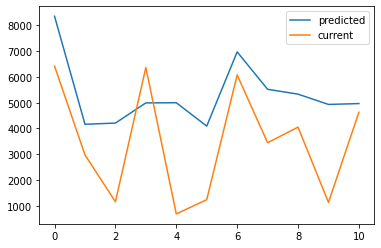

In [ ]:
df_final = df_mean[(df_mean['name'].isin(names_list))]

x = pd.merge(df_final,target_df_final,on='name',how ='right')
x = x.rename(columns={'total_points_x': 'predicted', 'total_points_y': 'current'})
x = x[["name","predicted","current"]]
x.plot.line()

In [ ]:
expected_scores = df_mean["total_points"]  # total points from last season
prices = df_mean["value"]
positions = df_mean["position"]
clubs = df_mean["team"]
# so we can read the results
names = df_mean["name"]
print(df_mean.dtypes)
decisions, captain_decisions, sub_decisions = select_team(expected_scores.values, prices.values, positions.values, clubs.values)

value           float64
total_points      int64
position          int64
name             object
team               int8
dtype: object


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Total expected score = 67539.0


In [ ]:
def convertNumToPos(pos):
  #print(type(pos))
  # print(pos)
  if pos == 1:
    return 'GK'
  elif pos == 3:
    return 'MID'
  elif pos == 2:
    return 'DEF'
  else:
    return 'FWD'

In [ ]:
from colorama import Fore, Style

In [ ]:
print(f'{Fore.LIGHTBLUE_EX}{Style.BRIGHT}Our Final playing XI as predicted by the model:')


names_list = []
curr_budget = 0
player_indices = []
total_points = {}
for i in range(df_mean.shape[0]):
    if decisions[i].value() != 0:
        names_list.append(names.iloc[i])
        total_points[names.iloc[i]] = expected_scores.iloc[i]
        player_indices.append(i)
        curr_budget+= prices.iloc[i]
        display(Markdown("**Name**= *{}*, **Expected Points** = {}, **Cost** = {}M$, **Position** = {}".format(names.iloc[i], expected_scores.iloc[i]/1000, prices.iloc[i],  convertNumToPos(positions.iloc[i]))))

print("")
print(f'{Fore.LIGHTBLUE_EX}{Style.BRIGHT}Captain:')
for i in range(df_mean.shape[0]):
    if captain_decisions[i].value() == 1:
        display(Markdown("**Name**= *{}*, **Expected Points** = {}, **Cost** = {}M$, **Position** = {}".format(names.iloc[i], expected_scores.iloc[i]/1000, prices.iloc[i],  convertNumToPos(positions.iloc[i]))))

print("")
print(f'{Fore.LIGHTBLUE_EX}{Style.BRIGHT}List of Substitutes:')

for i in range(df_mean.shape[0]):
    if sub_decisions[i].value() == 1:
        names_list.append(names.iloc[i])
        player_indices.append(i)
        curr_budget+= prices.iloc[i]
        display(Markdown("**Name**= *{}*, **Expected Points** = {}, **Cost** = {}M$, **Position** = {}".format(names.iloc[i], expected_scores.iloc[i]/1000, prices.iloc[i],  convertNumToPos(positions.iloc[i]))))

Our Final playing XI as predicted by the model:


**Name**= *Bruno Miguel Borges Fernandes*, **Expected Points** = 8.357, **Cost** = 8.6071M$, **Position** = MID

**Name**= *Dean Henderson*, **Expected Points** = 4.21, **Cost** = 4.8657M$, **Position** = GK

**Name**= *George Baldock*, **Expected Points** = 3.736, **Cost** = 4.821M$, **Position** = DEF

**Name**= *Jamie Vardy*, **Expected Points** = 4.789, **Cost** = 9.2335M$, **Position** = FWD

**Name**= *John Lundstram*, **Expected Points** = 3.789, **Cost** = 4.7526M$, **Position** = MID

**Name**= *Luke Thomas*, **Expected Points** = 5.0, **Cost** = 4.0M$, **Position** = DEF

**Name**= *Matt Doherty*, **Expected Points** = 4.092, **Cost** = 5.5828M$, **Position** = DEF

**Name**= *Mohamed Salah*, **Expected Points** = 6.973, **Cost** = 11.8578M$, **Position** = MID

**Name**= *Pierre-Emerick Aubameyang*, **Expected Points** = 5.522, **Cost** = 10.9333M$, **Position** = MID

**Name**= *Raheem Sterling*, **Expected Points** = 5.333, **Cost** = 9.9065M$, **Position** = MID

**Name**= *RaÃºl JimÃ©nez*, **Expected Points** = 4.934, **Cost** = 6.9447M$, **Position** = FWD


Captain:


**Name**= *Bruno Miguel Borges Fernandes*, **Expected Points** = 8.357, **Cost** = 8.6071M$, **Position** = MID


List of Substitutes:


**Name**= *Issa Diop*, **Expected Points** = 2.144, **Cost** = 4.3657M$, **Position** = DEF

**Name**= *John Egan*, **Expected Points** = 3.5, **Cost** = 4.5289M$, **Position** = DEF

**Name**= *Karlan Grant*, **Expected Points** = 3.214, **Cost** = 5.0M$, **Position** = FWD

**Name**= *Mathew Ryan*, **Expected Points** = 3.377, **Cost** = 4.5701M$, **Position** = GK

In [ ]:
expected_scores = df_mean["total_points"]  # total points from last season
prices = df_mean["value"]
positions = df_mean["position"]
clubs = df_mean["team"]
# so we can read the results
names = df_mean["name"]
print(df_mean.dtypes)
decisions, captain_decisions, sub_decisions = select_team(expected_scores.values, prices.values, positions.values, clubs.values)

value           float64
total_points      int64
position          int64
name             object
team               int8
dtype: object


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Total expected score = 67539.0


In [ ]:
final_list

['Bruno Miguel Borges Fernandes',
 'CÃ©sar Azpilicueta',
 'Dean Henderson',
 'Harry Kane',
 'Luke Thomas',
 'Matt Doherty',
 'Mohamed Salah',
 'Pierre-Emerick Aubameyang',
 'Raheem Sterling',
 'RaÃºl JimÃ©nez',
 'Sadio ManÃ©']

In [ ]:
response = requests.get("https://fantasy.premierleague.com/api/entry/132645/history/")
response = response.json()
response['current']
points = []
for i in response['current']:
  points.append(i['points']*1000)
points= points[:8]
points

[94000, 79000, 68000, 79000, 49000, 57000, 38000, 65000]

2020-21/gws/gw1.csv


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


2020-21/gws/gw2.csv
2020-21/gws/gw3.csv
2020-21/gws/gw4.csv
2020-21/gws/gw5.csv
2020-21/gws/gw6.csv
2020-21/gws/gw7.csv
2020-21/gws/gw8.csv
2020-21/gws/gw9.csv
2020-21/gws/gw10.csv
2020-21/gws/gw11.csv
2020-21/gws/gw12.csv
2020-21/gws/gw13.csv
2020-21/gws/gw14.csv
2020-21/gws/gw15.csv
2020-21/gws/gw16.csv
2020-21/gws/gw17.csv
2020-21/gws/gw18.csv
2020-21/gws/gw19.csv
2020-21/gws/gw20.csv
2020-21/gws/gw21.csv
2020-21/gws/gw22.csv
2020-21/gws/gw23.csv
2020-21/gws/gw24.csv
2020-21/gws/gw25.csv
2020-21/gws/gw26.csv
2020-21/gws/gw27.csv
2020-21/gws/gw28.csv
2020-21/gws/gw29.csv
2020-21/gws/gw30.csv
2020-21/gws/gw31.csv
2020-21/gws/gw32.csv
2020-21/gws/gw33.csv
2020-21/gws/gw34.csv
2020-21/gws/gw35.csv
2020-21/gws/gw36.csv


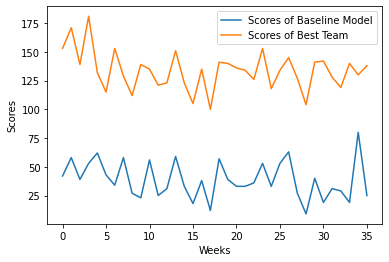

In [ ]:
sum_list = []
best_list = []
for i in range(1,37):
  target = pd.read_csv("2020-21/gws/gw"+str(i)+".csv",encoding='latin1')
  target["position"] = target["position"].apply(convertPosToNum)
  print("2020-21/gws/gw"+str(i)+".csv")
  target_x = target.groupby(['name','total_points','value','position','team']).sum().reset_index()

  target_x['team'] = target_x['team'].astype(dtype="category")
  target_x['team'] =  target_x.team.cat.codes
  total_score = 0

  expected_scores = target_x["total_points"]  # total points from last season
  prices = target_x["value"]/10
  positions = target_x["position"]
  clubs = target_x['team']
  # so we can read the results
  names = target["name"]

  decisions, captain_decisions = getTeam(expected_scores.values, prices.values, positions.values, clubs.values)

  tscore = 0
  for x in range(target_x.shape[0]):
    if decisions[x].value() != 0:
        tscore += expected_scores.iloc[x]

  best_list.append(tscore)
  for name in final_list:
    x = target.groupby(['name']).sum().reset_index()
    x = x[(x['name'] == name)]
    # print(len(x['total_points'].values))
    if len(x['total_points'].values) != 0:
      total_score = total_score + x['total_points'].values[0]
  sum_list.append(total_score )


plt.plot(sum_list)
plt.plot(best_list)
plt.xlabel("Weeks")
plt.ylabel("Scores")
plt.legend([ 'Scores of Baseline Model','Scores of Best Team'])

In [ ]:
print("dfvdfs", len(names_list))

dfvdfs 15


In [ ]:
budget_left = 100-curr_budget
budget_left

0.030300000000011096

In [ ]:
# print(total_points)
target_df_final = df_target_mean[(df_target_mean['name'].isin(names_list))]
target_df_final['total_points'] = target_df_final['total_points']  *1000 
target_df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
94,Bruno Miguel Borges Fernandes,7.086842,0.368421,0.947368,22.894737,0.342105,37.234211,302.0,198.605263,0.947368,0.473684,10.426316,34.015789,81.605263,10.368421,0.000000,0.026316,0.0,0.000000,19.894737,0.000000,3.693357e+06,1.657895,1.421053,32.973684,6421.052632,97031.000000,185331.210526,88300.210526,111.710526,0.500000,0.157895,19.894737
166,Dean Henderson,1.218421,0.000000,0.026316,5.736842,0.105263,0.000000,305.0,198.605263,0.315789,0.000000,0.723684,7.247368,29.605263,10.368421,0.000000,0.000000,0.0,0.000000,19.894737,1.052632,1.265645e+05,1.657895,1.421053,0.000000,1157.894737,739.447368,5460.921053,4721.473684,52.526316,0.500000,0.078947,19.894737
234,George Baldock,1.265789,0.052632,0.052632,9.131579,0.105263,8.176316,351.0,189.473684,1.342105,0.000000,2.360526,9.247368,73.342105,10.263158,0.000000,0.000000,0.0,0.000000,19.421053,0.000000,1.085233e+05,0.921053,1.263158,6.157895,1657.894737,-6984.500000,1568.605263,8553.105263,50.605263,0.500000,0.184211,19.421053
270,Issa Diop,1.057895,0.000000,0.026316,6.157895,0.052632,0.457895,451.0,190.368421,0.578947,0.052632,1.165789,9.884211,36.289474,10.052632,0.026316,0.000000,0.0,0.000000,19.526316,0.000000,4.654561e+04,1.368421,1.500000,1.263158,1105.263158,-1743.394737,1287.289474,3030.684211,43.552632,0.500000,0.078947,19.526316
306,Jamie Vardy,5.142105,0.368421,0.605263,17.078947,0.210526,9.384211,224.0,188.315789,1.157895,0.394737,6.534211,21.557895,74.684211,10.578947,0.000000,0.026316,0.0,0.000000,19.421053,0.000000,1.698422e+06,1.684211,1.421053,34.368421,4921.052632,24065.657895,152209.078947,128143.421053,101.342105,0.500000,0.026316,19.421053
338,John Egan,1.057895,0.026316,0.105263,10.789474,0.105263,1.339474,353.0,189.473684,1.263158,0.000000,1.960526,14.331579,69.157895,10.263158,0.000000,0.000000,0.0,0.026316,19.421053,0.000000,2.297645e+05,0.921053,1.263158,3.947368,1500.000000,-24163.078947,1180.921053,25344.000000,47.578947,0.500000,0.184211,19.421053
340,John Lundstram,1.036842,0.052632,0.052632,6.421053,0.078947,9.128947,355.0,189.473684,1.078947,0.000000,2.086842,6.457895,53.342105,10.263158,0.000000,0.026316,0.0,0.026316,19.421053,0.000000,1.980302e+05,0.921053,1.263158,5.421053,1263.157895,-18503.868421,1295.473684,19799.342105,50.131579,0.500000,0.210526,19.421053
379,Karlan Grant,0.573529,0.000000,0.088235,3.058824,0.088235,1.876471,582.0,210.117647,0.764706,0.029412,1.211765,2.735294,32.941176,10.205882,0.000000,0.000000,0.0,0.000000,21.441176,0.000000,2.883176e+03,1.500000,1.235294,7.617647,1205.882353,29.117647,458.382353,429.264706,57.735294,0.500000,0.029412,21.441176
429,Luke Thomas,0.826316,0.000000,0.000000,3.473684,0.026316,2.939474,240.0,188.315789,0.473684,0.026316,1.002632,4.447368,25.473684,10.578947,0.000000,0.000000,0.0,0.000000,19.421053,0.000000,1.818947e+04,1.684211,1.421053,2.657895,684.210526,454.789474,1713.526316,1258.736842,42.184211,0.500000,0.052632,19.421053
458,Mathew Ryan,1.031579,0.000000,0.000000,5.684211,0.078947,0.281579,70.0,186.842105,0.552632,0.000000,0.542105,5.094737,33.157895,10.947368,0.000000,0.000000,0.0,0.000000,19.473684,0.631579,7.528291e+05,1.500000,1.210526,0.052632,973.684211,-20607.052632,13570.421053,34177.473684,42.973684,0.473684,0.026316,19.473684


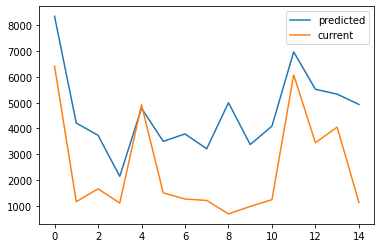

In [ ]:
df_final = df_mean[(df_mean['name'].isin(names_list))]

x = pd.merge(df_final,target_df_final,on='name',how ='right')
x = x.rename(columns={'total_points_x': 'predicted', 'total_points_y': 'current'})
x = x[["name","predicted","current"]]
x.plot.line()

In [ ]:
x

,name,predicted,current
0,Bruno Miguel Borges Fernandes,8357,6421.052632
1,Dean Henderson,4210,1157.894737
2,George Baldock,3736,1657.894737
3,Issa Diop,2144,1105.263158
4,Jamie Vardy,4789,4921.052632
5,John Egan,3500,1500.000000
6,John Lundstram,3789,1263.157895
7,Karlan Grant,3214,1205.882353
8,Luke Thomas,5000,684.210526
9,Mathew Ryan,3377,973.684211


In [ ]:
x.sum()

name         Bruno Miguel Borges FernandesDean HendersonGeo...
predicted                                                68970
current                                                36837.5
dtype: object

##Transfer Strategy(L.P.)

In [ ]:
position_data = {
    "gk": {"position_id": 1, "min_starters": 1, "max_starters": 1, "num_total": 2},
    "df": {"position_id": 2, "min_starters": 3, "max_starters": 5, "num_total": 5},
    "mf": {"position_id": 3, "min_starters": 3, "max_starters": 5, "num_total": 5},
    "fw": {"position_id": 4, "min_starters": 1, "max_starters": 3, "num_total": 3},
}

In [ ]:
def get_decision_array(name, length):
    """Helper function for generating array of LpVariables"""
    return [
        pulp.LpVariable("{}_{}".format(name, i), lowBound=0, upBound=1, cat='Integer')
        for i in range(length)
    ]

In [ ]:
#Using multiple transfers

class TransferOptimiser:
    def __init__(self, expected_scores, buy_prices, sell_prices, positions, clubs):
        self.expected_scores = expected_scores
        self.buy_prices = buy_prices
        self.sell_prices = sell_prices
        self.positions = positions
        self.clubs = clubs
        self.num_players = len(buy_prices)

    def instantiate_decision_arrays(self):
        # we will make transfers in and out of the squad, and then pick subs and captains from that squad
        transfer_in_decisions_free = get_decision_array("transfer_in_free", self.num_players)
        transfer_in_decisions_paid = get_decision_array("transfer_in_paid", self.num_players)
        transfer_out_decisions = get_decision_array("transfer_out_paid", self.num_players)
        
        # total transfers in will be useful later
        # transfer_in_decisions = transfer_in_decisions_free + transfer_in_decisions_paid
        transfer_in_decisions = [a + b for a, b in zip(transfer_in_decisions_free, transfer_in_decisions_paid)]

        sub_decisions = get_decision_array("subs", self.num_players)
        captain_decisions = get_decision_array("captain", self.num_players)
        return transfer_in_decisions_free, transfer_in_decisions_paid, transfer_out_decisions, transfer_in_decisions, sub_decisions, captain_decisions

    def encode_player_indices(self, indices):
        decisions = np.zeros(self.num_players)
        decisions[indices] = 1
        return decisions

    def apply_transfer_constraints(self, model, transfer_in_decisions_free, transfer_in_decisions,
                                   transfer_out_decisions, budget_now):
        # only 1 free transfer
        model += sum(transfer_in_decisions_free) <= 1

        # budget constraint
        transfer_in_cost = sum(transfer_in_decisions * self.buy_prices)
        transfer_out_cost = sum(transfer_out_decisions * self.sell_prices)
        budget_next_week = budget_now + transfer_out_cost - transfer_in_cost
        model += budget_next_week >= 0


    def solve(self, current_squad_indices, budget_now, sub_factor):
        current_squad_decisions = self.encode_player_indices(current_squad_indices)
        print("curr_sq", len(current_squad_decisions))
        model = pulp.LpProblem("Transfer optimisation", pulp.LpMaximize)
        transfer_in_decisions_free, transfer_in_decisions_paid, transfer_out_decisions, transfer_in_decisions, sub_decisions, captain_decisions = self.instantiate_decision_arrays()
        print("tr_in_dc_free", len(transfer_in_decisions_free))
        print("tr_in_dc_paid", len(transfer_in_decisions_paid))
        print("tr_out_dc", len(transfer_out_decisions))
        print("tr_in_dc", len(transfer_in_decisions))
        print("sub_dc", len(sub_decisions))
        print("cap_dc", len(captain_decisions))

        # calculate new team from current team + transfers
        next_week_squad = current_squad_decisions + transfer_in_decisions - transfer_out_decisions
        starters = next_week_squad - sub_decisions

        # points penalty for additional transfers
        transfer_penalty = sum(transfer_in_decisions_paid) * 4

        self.apply_transfer_constraints(model, transfer_in_decisions_free, transfer_in_decisions,
                                        transfer_out_decisions, budget_now)
        self.apply_formation_constraints(model, squad=next_week_squad, starters=starters,
                                         subs=sub_decisions, captains=captain_decisions)

        # objective function:
        model += self.get_objective(starters, sub_decisions, captain_decisions, sub_factor, transfer_penalty, self.expected_scores), "Objective"
        status = model.solve()

        print("Solver status: {}".format(status))
        print("Total expected score = {}".format(model.objective.value()))

        return transfer_in_decisions, transfer_out_decisions, starters, sub_decisions, captain_decisions

    def get_objective(self, starters, subs, captains, sub_factor, transfer_penalty, scores):
        starter_points = sum(starters * scores)
        sub_points = sum(subs * scores) * sub_factor
        captain_points = sum(captains * scores)
        return starter_points + sub_points + captain_points - transfer_penalty

    def apply_formation_constraints(self, model, squad, starters, subs, captains):
        for position, data in position_data.items():
            # formation constraints
            model += sum(starter for starter, position in zip(starters, self.positions) if position == data["position_id"]) >= data["min_starters"]
            model += sum(starter for starter, position in zip(starters, self.positions) if position == data["position_id"]) <= data["max_starters"]
            model += sum(selected for selected, position in zip(squad, self.positions) if position == data["position_id"]) == data["num_total"]

        # club constraint
        for club_id in np.unique(self.clubs):
            model += sum(selected for selected, club in zip(squad, self.clubs) if club == club_id) <= 3  # max 3 players

        # total team size
        model += sum(starters) == 11
        model += sum(squad) == 15
        model += sum(captains) == 1

        for i in range(self.num_players):
            model += (starters[i] - captains[i]) >= 0  # captain must also be on team
            model += (starters[i] + subs[i]) <= 1  # subs must not be on team


In [ ]:
#Using only 1 free transfer paid

class TransferOptimiserFree:
    def __init__(self, expected_scores, buy_prices, sell_prices, positions, clubs):
        self.expected_scores = expected_scores
        self.buy_prices = buy_prices
        self.sell_prices = sell_prices
        self.positions = positions
        self.clubs = clubs
        self.num_players = len(buy_prices)

    def instantiate_decision_arrays(self):
        # we will make transfers in and out of the squad, and then pick subs and captains from that squad
        transfer_in_decisions = get_decision_array("transfer_in_free", self.num_players)
        transfer_out_decisions = get_decision_array("transfer_out_free", self.num_players)
        # total transfers in will be useful later
        # transfer_in_decisions = transfer_in_decisions_free + transfer_in_decisions_paid
        sub_decisions = get_decision_array("subs", self.num_players)
        captain_decisions = get_decision_array("captain", self.num_players)
        return transfer_in_decisions, transfer_out_decisions, sub_decisions, captain_decisions

    def encode_player_indices(self, indices):
        decisions = np.zeros(self.num_players)
        decisions[indices] = 1
        return decisions

    def apply_transfer_constraints(self, model, transfer_in_decisions,
                                   transfer_out_decisions, budget_now):
        # only 1 free transfer
        model += sum(transfer_in_decisions) <= 1

        # budget constraint
        transfer_in_cost = sum(transfer_in_decisions * self.buy_prices)
        transfer_out_cost = sum(transfer_out_decisions * self.sell_prices)
        budget_next_week = budget_now + transfer_out_cost - transfer_in_cost
        model += budget_next_week >= 0


    def solve(self, current_squad_indices, budget_now, sub_factor):
        current_squad_decisions = self.encode_player_indices(current_squad_indices)
        print("curr_sq", len(current_squad_decisions))
        model = pulp.LpProblem("Transfer optimisation", pulp.LpMaximize)
        transfer_out_decisions, transfer_in_decisions, sub_decisions, captain_decisions = self.instantiate_decision_arrays()
        print("tr_out_dc", len(transfer_out_decisions))
        print("tr_in_dc", len(transfer_in_decisions))
        print("sub_dc", len(sub_decisions))
        print("cap_dc", len(captain_decisions))

        # calculate new team from current team + transfers
        next_week_squad = current_squad_decisions + transfer_in_decisions - transfer_out_decisions
        starters = next_week_squad - sub_decisions

        # points penalty for additional transfers
        self.apply_transfer_constraints(model, transfer_in_decisions,
                                        transfer_out_decisions, budget_now)
        self.apply_formation_constraints(model, squad=next_week_squad, starters=starters,
                                         subs=sub_decisions, captains=captain_decisions)

        # objective function:
        model += self.get_objective(starters, sub_decisions, captain_decisions, sub_factor, self.expected_scores), "Objective"
        status = model.solve()

        print("Solver status: {}".format(status))

        return transfer_in_decisions, transfer_out_decisions, starters, sub_decisions, captain_decisions

    def get_objective(self, starters, subs, captains, sub_factor, scores):
        starter_points = sum(starters * scores)
        sub_points = sum(subs * scores) * sub_factor
        captain_points = sum(captains * scores)
        return starter_points + sub_points + captain_points

    def apply_formation_constraints(self, model, squad, starters, subs, captains):
        for position, data in position_data.items():
            # formation constraints
            model += sum(starter for starter, position in zip(starters, self.positions) if position == data["position_id"]) >= data["min_starters"]
            model += sum(starter for starter, position in zip(starters, self.positions) if position == data["position_id"]) <= data["max_starters"]
            model += sum(selected for selected, position in zip(squad, self.positions) if position == data["position_id"]) == data["num_total"]

        # club constraint
        for club_id in np.unique(self.clubs):
            model += sum(selected for selected, club in zip(squad, self.clubs) if club == club_id) <= 3  # max 3 players

        # total team size
        model += sum(starters) == 11
        model += sum(squad) == 15
        model += sum(captains) == 1

        for i in range(self.num_players):
            model += (starters[i] - captains[i]) >= 0  # captain must also be on team
            model += (starters[i] + subs[i]) <= 1  # subs must not be on team

In [ ]:
def get_decision_array_2d(name, n_players, n_weeks):
    return np.array([[
        pulp.LpVariable("{}_{}_w{}".format(name, i, j), lowBound=0, upBound=1, cat='Integer')
        for i in range(n_players)
    ] for j in range(n_weeks)])


In [ ]:
class MultiHorizonTransferOptimiser(TransferOptimiser):
    """We now plan transfer decisions over multiple weeks. This means we need a 2d array of expected
    scores (n_players x n_weeks) and 2d arrays of decision variables"""
    def __init__(self, expected_scores, buy_prices, sell_prices, positions, clubs,
                 n_weeks):
        super().__init__(expected_scores, buy_prices, sell_prices, positions, clubs)
        self.num_weeks = n_weeks

    def instantiate_decision_arrays(self):
        # we will make transfers in and out of the squad, and then pick subs and captains from that squad
        transfer_in_decisions_free = get_decision_array_2d("transfer_in_free", self.num_players, self.num_weeks)
        transfer_in_decisions_paid = get_decision_array_2d("transfer_in_paid", self.num_players, self.num_weeks)
        transfer_out_decisions = get_decision_array_2d("transfer_out_paid", self.num_players, self.num_weeks)
        # total transfers in will be useful later
        transfer_in_decisions = [a + b for a, b in zip(transfer_in_decisions_free, transfer_in_decisions_paid)]

        sub_decisions = get_decision_array_2d("subs", self.num_players, self.num_weeks)
        captain_decisions = get_decision_array_2d("captain", self.num_players, self.num_weeks)
        return transfer_in_decisions_free, transfer_in_decisions_paid, transfer_out_decisions, transfer_in_decisions, sub_decisions, captain_decisions

    def solve(self, current_squad_indices, budget_now, sub_factor):
        current_squad_decisions = self.encode_player_indices(current_squad_indices)
        model = pulp.LpProblem("Transfer optimisation", pulp.LpMaximize)
        (transfer_in_decisions_free_all, transfer_in_decisions_paid_all, transfer_out_decisions_all,
         transfer_in_decisions_all, sub_decisions_all, captain_decisions_all) = self.instantiate_decision_arrays()

        total_points = 0
        for w in range(self.num_weeks):
            transfer_in_decisions_free = transfer_in_decisions_free_all[w]
            transfer_in_decisions_paid = transfer_in_decisions_paid_all[w]
            transfer_out_decisions = transfer_out_decisions_all[w]
            transfer_in_decisions = transfer_in_decisions_all[w]
            sub_decisions = sub_decisions_all[w]
            captain_decisions = captain_decisions_all[w]

            # calculate new team from current team + transfers
            next_week_squad = current_squad_decisions + transfer_in_decisions - transfer_out_decisions
            starters = next_week_squad - sub_decisions

            # points penalty for additional transfers
            transfer_penalty = sum(transfer_in_decisions_paid) * 4

            self.apply_transfer_constraints(model, transfer_in_decisions_free, transfer_in_decisions,
                                            transfer_out_decisions, budget_now)
            self.apply_formation_constraints(model, squad=next_week_squad, starters=starters,
                                             subs=sub_decisions, captains=captain_decisions)

            # objective function:
            total_points += self.get_objective(starters, sub_decisions, captain_decisions, sub_factor, transfer_penalty, self.expected_scores[w])
            print(type(total_points))
            current_squad_decisions = next_week_squad

        model += total_points, "Objective"
        model.solve()

        return transfer_in_decisions_all, transfer_out_decisions_all, sub_decisions_all, sub_decisions_all, captain_decisions_all

In [ ]:
# next week score forecast: start with points-per-game
score_forecast = df_mean["total_points"]
# let's make up a nonsense forecast to add some dynamics -- +1 to Chelsea players
score_forecast.loc[df_mean["team"] == 4] += 1000
# -1 for Liverpool players
score_forecast.loc[df_mean["team"] == 10] -= 1000
score_forecast = score_forecast.fillna(0)




# expected_scores = df_mean["total_points"]  # total points from last season
# prices = df_mean["value"]
# positions = df_mean["position"]
# clubs = df_mean["team"]
# # so we can read the results
# names = df_mean["name"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
##using both free transfer and paid
opt = TransferOptimiser(score_forecast.values, prices.values, prices.values, positions.values, clubs.values)

In [ ]:

##using only free transfer, no paid
opt = TransferOptimiserFree(score_forecast.values, prices.values, prices.values, positions.values, clubs.values)

In [ ]:
df_mean

,value,total_points,position,name,team
0,4.4285,1742,4,Aaron Connolly,2
1,5.0276,1914,2,Aaron Cresswell,18
2,5.1228,2359,3,Aaron Mooy,2
3,4.2986,1750,1,Aaron Ramsdale,14
4,4.7425,2183,2,Aaron Wan-Bissaka,12
...,...,...,...,...,...
496,6.2634,3461,3,Youri Tielemans,9
497,4.8565,1078,3,Yves Bissouma,2
498,4.0000,0,2,Zeze Steven Sessegnon,7
499,4.8700,2440,2,Ãaglar SÃ¶yÃ¼ncÃ¼,9


In [ ]:
df_mean[df_mean["team"] == 10]

,value,total_points,position,name,team
12,4.4092,-928,1,AdriÃ¡n San Miguel del Castillo,10
18,6.0434,-323,3,Alex Oxlade-Chamberlain,10
24,5.9131,1921,1,Alisson Ramses Becker,10
28,5.6815,1802,2,Andrew Robertson,10
52,5.3802,236,2,Ben Davies,10
59,4.3093,-1907,3,Ben Woodburn,10
81,4.4378,-2000,1,Caoimhin Kelleher,10
102,4.5000,-1698,3,Curtis Jones,10
131,6.1250,1210,3,Diogo Jota,10
132,6.0812,-653,4,Divock Origi,10


In [ ]:
transfer_in_decisions, transfer_out_decisions, starters, sub_decisions, captain_decisions = opt.solve(player_indices, budget_left, sub_factor=0.2)

curr_sq 567
tr_out_dc 567
tr_in_dc 567
sub_dc 567
cap_dc 567


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


ValueError: ignored

In [ ]:
player_indices

In [ ]:
len(transfer_in_decisions)

NameError: ignored

In [ ]:
for i in range(len(transfer_in_decisions)):
    if transfer_in_decisions[i].value() == 1:
        print("Transferred in: {} {} {}".format(names[i], prices[i], score_forecast[i]))
    if transfer_out_decisions[i].value() == 1:
        print("Transferred out: {} {} {}".format(names[i], prices[i], score_forecast[i]))

In [ ]:
player_indices = []
budget_left = 0
print()
print("First Team:")
for i in range(len(starters)):
    if starters[i].value() == 1:
        budget_left+= prices[i]
        print("{}{}".format(names[i], "*" if captain_decisions[i].value() == 1 else ""))
        player_indices.append(i)
print()
print("Subs:")
for i in range(len(sub_decisions)):
    if sub_decisions[i].value() == 1:
        budget_left+= prices[i]
        print(names[i])
        player_indices.append(i)

print()
print("Budget Left: ", 100-budget_left)
budget_left = 100-budget_left



First Team:
Bruno Miguel Borges Fernandes*
Dean Henderson
George Baldock
Jamie Vardy
John Lundstram
Luke Thomas
Matt Doherty
Mohamed Salah
Pierre-Emerick Aubameyang
Raheem Sterling
RaÃºl JimÃ©nez

Subs:
Issa Diop
John Egan
Karlan Grant
Mathew Ryan

Budget Left:  0.030300000000011096


In [ ]:
df_mean[df_mean.total_points <0]

,value,total_points,position,name,team
59,4.3093,-907,3,Ben Woodburn,10
81,4.4378,-1000,1,Caoimhin Kelleher,10
102,4.5000,-698,3,Curtis Jones,10
188,4.4305,-889,3,Harvey Elliott,10
369,3.9526,-1000,2,Nathaniel Phillips,10
371,4.0000,-364,2,Neco Williams,10


In [ ]:
x

,name,predicted,current
0,Bruno Miguel Borges Fernandes,8357,6421.052632
1,CÃ©sar Azpilicueta,4164,2973.684211
2,Dean Henderson,4210,1157.894737
3,Harry Kane,4993,6368.421053
4,Luke Thomas,5000,684.210526
5,Matt Doherty,4092,1236.842105
6,Mohamed Salah,6973,6078.947368
7,Pierre-Emerick Aubameyang,5522,3447.368421
8,Raheem Sterling,5333,4052.631579
9,RaÃºl JimÃ©nez,4934,1131.578947


In [ ]:
HORIZON = 4
multi_score_forecast = pd.DataFrame({"week_{}".format(i): df_mean["total_points"] for i in range(HORIZON)})
multi_score_forecast.head()


multi_score_forecast.loc[df_mean["team"] == 11, "week_0"] += 1000
multi_score_forecast.loc[df_mean["team"] == 8, "week_1"] += 0
multi_score_forecast.loc[df_mean["team"] == 8, "week_2"] -= 1000
multi_score_forecast.loc[df_mean["team"] == 12, "week_3"] -= 1000

multi_score_forecast.loc[df_mean["team"] == 14, "week_0"] -= 1
multi_score_forecast.loc[df_mean["team"] == 14, "week_1"] += 1000
multi_score_forecast.loc[df_mean["team"] == 11, "week_2"] += 1000
multi_score_forecast.loc[df_mean["team"] == 12, "week_3"] -= 1000

opt = MultiHorizonTransferOptimiser(multi_score_forecast.values.T, prices.values, prices.values, positions.values, clubs.values, 4)
transfer_in_decisions, transfer_out_decisions, starters, sub_decisions, captain_decisions = opt.solve(player_indices, budget_left, sub_factor=0.2)

for week in range(len(transfer_in_decisions)):
    print("Week {}".format(week))
    for i in range(len(transfer_in_decisions[week])):
        if transfer_in_decisions[week][i].value() == 1:
            print("Transferred in: {} {} {}".format(names[i], prices[i], multi_score_forecast.values.T[week][i]))
        if transfer_out_decisions[week][i].value() == 1:
            print("Transferred out: {} {} {}".format(names[i], prices[i], multi_score_forecast.values.T[week][i]))

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


<class 'pulp.pulp.LpAffineExpression'>
<class 'pulp.pulp.LpAffineExpression'>
<class 'pulp.pulp.LpAffineExpression'>
<class 'pulp.pulp.LpAffineExpression'>


# New data of 538 website

In [ ]:
%ls

2016-17/  2021-22/                           spi_global_rankings_intl.csv
2017-18/  cleaned_merged_seasons.csv         spi_matches.csv
2018-19/  cleaned_merged_seasons.csv.gsheet  spi_matches_latest.csv
2019-20/  master_team_list.csv
2020-21/  spi_global_rankings.csv


In [ ]:
df_spi_rank = pd.read_csv("spi_matches_latest.csv")

In [ ]:
df_spi_rank = df_spi_rank[df_spi_rank.season == 2021]

In [ ]:
df_spi_rank = df_spi_rank[df_spi_rank.season == 2021]

In [ ]:
df_spi_rank

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
40173,2021,2021-02-26,1947,Japanese J League,Kawasaki Frontale,Yokohama F. Marinos,58.32,44.46,0.5973,0.2204,0.1823,2.41,1.43,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
40195,2021,2021-02-26,1947,Japanese J League,Oita Trinita,Tokushima Vortis,21.97,23.85,0.3891,0.3388,0.2721,1.21,1.11,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
40196,2021,2021-02-26,1947,Japanese J League,Sanfrecce Hiroshima,Vegalta Sendai,34.60,21.72,0.5703,0.1926,0.2371,1.63,0.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
40197,2021,2021-02-26,1947,Japanese J League,Urawa Red Diamonds,FC Tokyo,29.20,33.99,0.3534,0.3942,0.2524,1.27,1.36,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
40198,2021,2021-02-26,1947,Japanese J League,Consadole Sapporo,Yokohama FC,30.44,18.14,0.5695,0.2098,0.2207,1.81,1.01,NaN,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54040,2021,2022-05-29,1871,Spanish Segunda Division,Leganes,Almeria,37.46,45.06,0.3401,0.3502,0.3097,1.12,1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54041,2021,2022-05-29,1871,Spanish Segunda Division,Real Sociedad II,Real Zaragoza,28.42,31.75,0.3682,0.3208,0.3110,1.17,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54042,2021,2022-05-29,1871,Spanish Segunda Division,Real Valladolid,SD Huesca,42.36,31.36,0.5187,0.2119,0.2693,1.62,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54043,2021,2022-05-29,1871,Spanish Segunda Division,Sporting Gijón,Las Palmas,29.82,35.23,0.3572,0.3311,0.3117,1.15,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2021-22/gws/merged_gw.csv", "merged_gw.csv")

('merged_gw.csv', <http.client.HTTPMessage at 0x7fb72cbd4110>)

In [ ]:
%ls

2016-17/  2021-22/                           merged_season_2021-22.csv
2017-18/  cleaned_merged_seasons.csv         spi_global_rankings.csv
2018-19/  cleaned_merged_seasons.csv.gsheet  spi_global_rankings_intl.csv
2019-20/  master_team_list.csv               spi_matches.csv
2020-21/  merged_gw_2122.csv                 spi_matches_latest.csv


In [ ]:
df_gw_22 = pd.read_csv("merged_gw_2122.csv")

In [ ]:
df_gw_22

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234,Wilfred Ndidi,MID,Leicester,-0.2,0,0,7,0,1.7,216,113,3,0,1.3,11.0,2021-11-20T12:30:00Z,90,6,0,0,0,0,12,0,77670,3,0,0.0,2,492,2230,1738,48,True,0,12
7235,Matt Ritchie,DEF,Newcastle,1.3,1,0,22,0,44.7,292,116,3,0,7.5,30.6,2021-11-20T15:00:00Z,90,3,0,0,0,0,12,0,22693,3,3,0.0,4,2632,4023,1391,49,True,0,12
7236,Nathan Redmond,MID,Southampton,2.5,0,0,0,0,0.0,336,117,0,0,0.0,0.0,2021-11-20T15:00:00Z,0,15,0,0,0,0,12,0,24704,1,2,0.0,0,-8325,1335,9660,59,False,0,12
7237,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,111,0,0,0.0,0.0,2021-11-20T15:00:00Z,0,2,0,0,0,0,12,0,673,0,2,0.0,0,-13,0,13,45,False,0,12
